#### Introduction
##### Linear Regression is a well know technique used to determine the relationship between economic variables. The underlying problem is the dependence of the CPI – Consumer Price Index on the Unemployment rate, Nominal GDP, Bank Rate, PPI – Producer Price Index & the FTSE – Financial Times Stock Index for the United Kingdom using authentic data (collected from the Bank of England, Eurostat and etc.) The regression model is meant to establish a mathematical dependence of the CPI to the aforementioned independent variables and therefore predict its future values, as the CPI itself represents a good measure of the level of inflation a country has.The independent variables have been selected based on economic theory and their known relation to inflation, increase/decrease in these set of values is a good indication of the economic climate in a country and there have been many cases in the past when one or more of these signaled a worrying rise in the inflation level. Additionally, for better model performance and more accurate predictions – Time Series Analysis was used for the later years of the dataset, starting from 2015 and onwards. Due to high oscillations and volatility in the variables in these years, time series analysis proved to be more efficient in predicting CPI. The SARIMAX model was chosen as best fit, and lag feature was used as exogenous variable – Bank Rate shifted for 14 months due to the monetary policy lag.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as  mpatches
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objs as go
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from datetime import date, timedelta
import ipywidgets as widgets
import chart_studio.plotly as py
import plotly.express as px
import plotly.io as pio
from pmdarima import auto_arima
from statsmodels.tools.eval_measures import rmse
from statsmodels.tsa.statespace.sarimax import SARIMAX
import plotly.graph_objs as go
import datetime, statsmodels, warnings
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from math import sqrt
from dateutil.relativedelta import relativedelta
from datetime import date, timedelta
import ipywidgets as widgets

In [2]:
import os

if not os.path.exists("images"):
    os.mkdir("images")

In [3]:
UK = pd.read_csv(r"C:\Users\TEA\Desktop\tea\Data Science project\UK\CSVs\UK_last_set.csv", sep = ";")

In [4]:
UK["Unemployment rate"] = UK['Unemployment rate'].str.replace('[A-Za-z]', '').str.replace(',', '.').astype(float)
UK["Nominal GDP at current prices"] = UK['Nominal GDP at current prices'].str.replace('[A-Za-z]', '').str.replace(',', '.').astype(float)
UK["Bank Rate"] = UK['Bank Rate'].str.replace('[A-Za-z]', '').str.replace(',', '.').astype(float)
UK["CPI"] = UK['CPI'].str.replace('[A-Za-z]', '').str.replace(',', '.').astype(float)
UK["FTSE"] = UK['FTSE'].str.replace('[A-Za-z]', '').str.replace(',', '.').astype(float)
UK["PPI (2015-base)"] = UK['PPI (2015-base)'].str.replace('[A-Za-z]', '').str.replace(',', '.').astype(float)
UK["Consumption"] = UK['Consumption'].str.replace('[A-Za-z]', '').str.replace(',', '.').astype(float)

In [5]:
UK

Year/Q  Year Quarter  Unemployment rate  Nominal GDP at current prices  \
0    1980T1  1980      T1               6.60                        61987.0   
1    1980T2  1980      T2               6.13                        63584.0   
2    1980T3  1980      T3               6.80                        65906.0   
3    1980T4  1980      T4               7.70                        68022.0   
4    1981T1  1981      T1               9.27                        69818.0   
..      ...   ...     ...                ...                            ...   
163  2020T4  2020      T4               5.07                       555343.0   
164  2021T1  2021      T1               4.83                       558974.0   
165  2021T2  2021      T2               4.68                       578182.0   
166  2021T3  2021      T3               4.33                       587198.0   
167  2021T4  2021      T4               2.78                       595875.0   

     Bank Rate     FTSE  PPI (2015-base)    CPI  Consumption  
0        17.00      NaN            33.90    NaN     128571.0  
1        17.00      NaN            35.20    NaN     125220.0  
2        16.02      NaN            35.80    NaN     126872.0  
3        15.20      NaN            36.50    NaN     124460.0  
4        13.55      NaN            37.60    NaN     126732.0  
..         ...      ...              ...    ...          ...  
163       0.10  5903.19           108.30  109.3     317465.0  
164       0.10  5120.82           110.10  109.5     303433.0  
165       0.10  6902.02           111.90  110.9     325257.0  
166       0.10  7063.16           114.60  112.0     331809.0  
167       0.10  7127.81           118.23  114.1          NaN  

[168 rows x 10 columns]

#### Preprocessing

In [6]:
UK.head(40)

Year/Q  Year Quarter  Unemployment rate  Nominal GDP at current prices  \
0   1980T1  1980      T1               6.60                        61987.0   
1   1980T2  1980      T2               6.13                        63584.0   
2   1980T3  1980      T3               6.80                        65906.0   
3   1980T4  1980      T4               7.70                        68022.0   
4   1981T1  1981      T1               9.27                        69818.0   
5   1981T2  1981      T2               9.37                        71203.0   
6   1981T3  1981      T3               9.80                        73174.0   
7   1981T4  1981      T4              10.10                        75458.0   
8   1982T1  1982      T1              10.67                        77330.0   
9   1982T2  1982      T2              10.53                        78848.0   
10  1982T3  1982      T3              10.70                        80294.0   
11  1982T4  1982      T4              11.00                        82527.0   
12  1983T1  1983      T1              11.40                        85485.0   
13  1983T2  1983      T2              11.33                        86257.0   
14  1983T3  1983      T3              11.50                        88399.0   
15  1983T4  1983      T4              11.63                        90672.0   
16  1984T1  1984      T1              11.73                        91461.0   
17  1984T2  1984      T2              11.90                        93354.0   
18  1984T3  1984      T3              11.77                        94677.0   
19  1984T4  1984      T4              11.67                        97894.0   
20  1985T1  1985      T1              11.43                        98724.0   
21  1985T2  1985      T2              11.40                       103360.0   
22  1985T3  1985      T3              11.30                       104938.0   
23  1985T4  1985      T4              11.30                       107139.0   
24  1986T1  1986      T1              11.27                       108451.0   
25  1986T2  1986      T2              11.30                       110255.0   
26  1986T3  1986      T3              11.40                       112095.0   
27  1986T4  1986      T4              11.30                       115560.0   
28  1987T1  1987      T1              10.60                       118009.0   
29  1987T2  1987      T2              10.87                       121866.0   
30  1987T3  1987      T3              10.40                       126823.0   
31  1987T4  1987      T4               9.87                       129528.0   
32  1988T1  1988      T1               8.83                       133272.0   
33  1988T2  1988      T2               8.87                       136265.0   
34  1988T3  1988      T3               8.50                       140896.0   
35  1988T4  1988      T4               8.17                       145547.0   
36  1989T1  1989      T1               7.43                       148788.0   
37  1989T2  1989      T2               7.30                       151553.0   
38  1989T3  1989      T3               7.13                       155702.0   
39  1989T4  1989      T4               7.03                       159082.0   

    Bank Rate     FTSE  PPI (2015-base)   CPI  Consumption  
0       17.00      NaN             33.9   NaN     128571.0  
1       17.00      NaN             35.2   NaN     125220.0  
2       16.02      NaN             35.8   NaN     126872.0  
3       15.20      NaN             36.5   NaN     124460.0  
4       13.55      NaN             37.6   NaN     126732.0  
5       12.00      NaN             38.9   NaN     126677.0  
6       12.51      NaN             39.6   NaN     126774.0  
7       14.60      NaN             40.5   NaN     126430.0  
8       13.79      NaN             41.5   NaN     126864.0  
9       13.02      NaN             42.1   NaN     126772.0  
10      11.35      NaN             42.8   NaN     128921.0  
11       9.69      NaN             43.6   NaN     130035.0  
12      10.8

In [7]:
UK.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year/Q                         168 non-null    object 
 1   Year                           168 non-null    int64  
 2   Quarter                        168 non-null    object 
 3   Unemployment rate              168 non-null    float64
 4   Nominal GDP at current prices  168 non-null    float64
 5   Bank Rate                      168 non-null    float64
 6   FTSE                           132 non-null    float64
 7   PPI (2015-base)                168 non-null    float64
 8   CPI                            136 non-null    float64
 9   Consumption                    167 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 13.2+ KB


In [8]:
UK.describe()

Year  Unemployment rate  Nominal GDP at current prices  \
count   168.000000         168.000000                     168.000000   
mean   2000.500000           7.249821                  296407.369048   
std      12.157155           2.357636                  154860.744475   
min    1980.000000           2.780000                   61987.000000   
25%    1990.000000           5.170000                  169259.500000   
50%    2000.500000           7.070000                  279098.000000   
75%    2011.000000           8.902500                  417024.500000   
max    2021.000000          11.900000                  595875.000000   

        Bank Rate         FTSE  PPI (2015-base)         CPI    Consumption  
count  168.000000   132.000000       168.000000  136.000000     167.000000  
mean     5.815119  5145.313788        76.976369   81.328676  236822.323353  
std      4.689346  1577.851146        21.426398   17.554208   69037.686410  
min      0.100000  2043.070000        33.900000   47.000000  124460.000000  
25%      0.500000  3993.475000        61.900000   68.650000  179497.500000  
50%      5.360000  5528.905000        74.500000   78.400000  247390.000000  
75%      9.592500  6386.670000        99.025000   98.175000  290552.000000  
max     17.000000  7606.040000       118.230000  114.100000  350422.000000

In [9]:
UK.isnull().sum()

Year/Q                            0
Year                              0
Quarter                           0
Unemployment rate                 0
Nominal GDP at current prices     0
Bank Rate                         0
FTSE                             36
PPI (2015-base)                   0
CPI                              32
Consumption                       1
dtype: int64

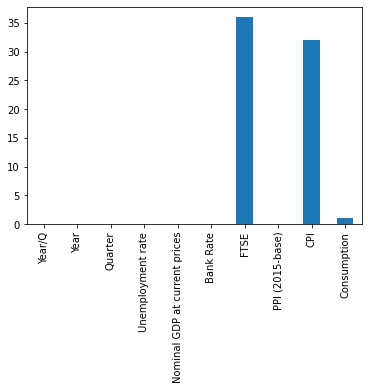

In [10]:
UK.isnull().sum().plot.bar()
plt.show()

<AxesSubplot:>

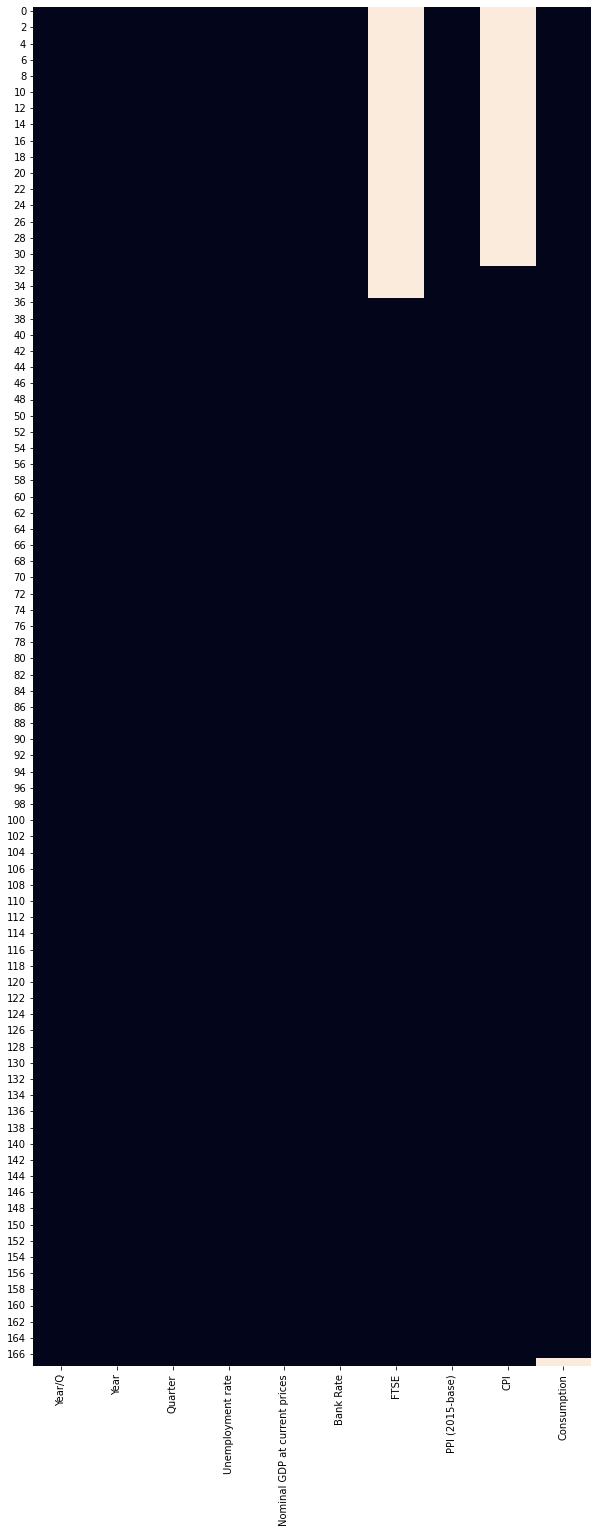

In [11]:
fig, ax = plt.subplots(figsize=(10,25))
sns.heatmap(UK.isnull(), cbar=False, ax=ax)

#### drop missing values

In [12]:
UK.drop(UK.index[:36], axis = 0, inplace = True)

In [13]:
UK.head(40)

Year/Q  Year Quarter  Unemployment rate  Nominal GDP at current prices  \
36  1989T1  1989      T1               7.43                       148788.0   
37  1989T2  1989      T2               7.30                       151553.0   
38  1989T3  1989      T3               7.13                       155702.0   
39  1989T4  1989      T4               7.03                       159082.0   
40  1990T1  1990      T1               7.13                       162445.0   
41  1990T2  1990      T2               6.90                       166936.0   
42  1990T3  1990      T3               7.00                       170034.0   
43  1990T4  1990      T4               7.33                       170458.0   
44  1991T1  1991      T1               8.43                       173712.0   
45  1991T2  1991      T2               8.47                       175761.0   
46  1991T3  1991      T3               9.00                       177373.0   
47  1991T4  1991      T4               9.40                       179975.0   
48  1992T1  1992      T1               9.93                       181825.0   
49  1992T2  1992      T2               9.80                       182215.0   
50  1992T3  1992      T3               9.90                       182624.0   
51  1992T4  1992      T4              10.23                       185631.0   
52  1993T1  1993      T1              10.53                       190264.0   
53  1993T2  1993      T2              10.50                       190678.0   
54  1993T3  1993      T3              10.30                       194035.0   
55  1993T4  1993      T4              10.27                       196437.0   
56  1994T1  1994      T1               9.63                       199614.0   
57  1994T2  1994      T2               9.73                       201318.0   
58  1994T3  1994      T3               9.50                       203543.0   
59  1994T4  1994      T4               9.13                       207814.0   
60  1995T1  1995      T1               8.73                       209003.0   
61  1995T2  1995      T2               8.77                       211430.0   
62  1995T3  1995      T3               8.63                       215228.0   
63  1995T4  1995      T4               8.50                       217567.0   
64  1996T1  1996      T1               8.07                       221337.0   
65  1996T2  1996      T2               8.30                       225761.0   
66  1996T3  1996      T3               8.13                       230073.0   
67  1996T4  1996      T4               7.97                       234020.0   
68  1997T1  1997      T1               7.07                       234071.0   
69  1997T2  1997      T2               7.20                       235589.0   
70  1997T3  1997      T3               7.07                       242836.0   
71  1997T4  1997      T4               6.60                       240089.0   
72  1998T1  1998      T1               6.33                       243702.0   
73  1998T2  1998      T2               6.30                       247355.0   
74  1998T3  1998      T3               6.27                       250384.0   
75  1998T4  1998      T4               6.17                       256877.0   

    Bank Rate     FTSE  PPI (2015-base)   CPI  Consumption  
36      12.88  2043.07             56.9  49.8     177734.0  
37      13.23  2127.80             57.8  50.8     179115.0  
38      13.76  2328.10             58.3  51.2     179002.0  
39      14.81  2280.70             59.0  52.1     179540.0  
40      14.88  2280.20             60.0  52.8     180045.0  
41      14.88  2274.37             61.3  54.9     181598.0  
42      14.88  2159.73             62.1  55.7     180542.0  
43      13.95  2114.40             63.0  56.8     180513.0  
44      13.38  2335.90             63.8  57.2     180414.0  
45      11.73  2466.83             65.0  59.1     179188.0  
46      10.78  2618.73             65.3  59.8     179455.0  
47      10.38  2493.10             65.5  60.5     179549.0  
48      10.3

In [14]:
UK.reset_index(drop=True, inplace=True)

#### Visualizations of variables

In [15]:
uk_gdp1 = UK["Nominal GDP at current prices"].groupby(by = UK["Year"]).sum()
uk_gdp1 = pd.DataFrame(uk_gdp1)
uk_gdp1.reset_index(drop = True, inplace = True)
year = pd. Series(UK["Year"])
year = year.drop_duplicates()
year.reset_index(drop = True, inplace = True)
uk_gdp1 = pd.concat([uk_gdp1,year], axis = 1)
uk_gdp1

Nominal GDP at current prices  Year
0                        615125.0  1989
1                        669873.0  1990
2                        706821.0  1991
3                        732295.0  1992
4                        771414.0  1993
5                        812289.0  1994
6                        853228.0  1995
7                        911191.0  1996
8                        952585.0  1997
9                        998318.0  1998
10                      1041970.0  1999
11                      1098500.0  2000
12                      1142023.0  2001
13                      1190336.0  2002
14                      1259970.0  2003
15                      1322795.0  2004
16                      1399656.0  2005
17                      1476722.0  2006
18                      1552470.0  2007
19                      1598752.0  2008
20                      1557120.0  2009
21                      1612195.0  2010
22                      1669509.0  2011
23                      1721355.0  2012
24                      1793155.0  2013
25                      1876162.0  2014
26                      1935212.0  2015
27                      2016638.0  2016
28                      2097143.0  2017
29                      2174380.0  2018
30                      2255283.0  2019
31                      2152646.0  2020
32                      2320229.0  2021

#### Nominal GDP

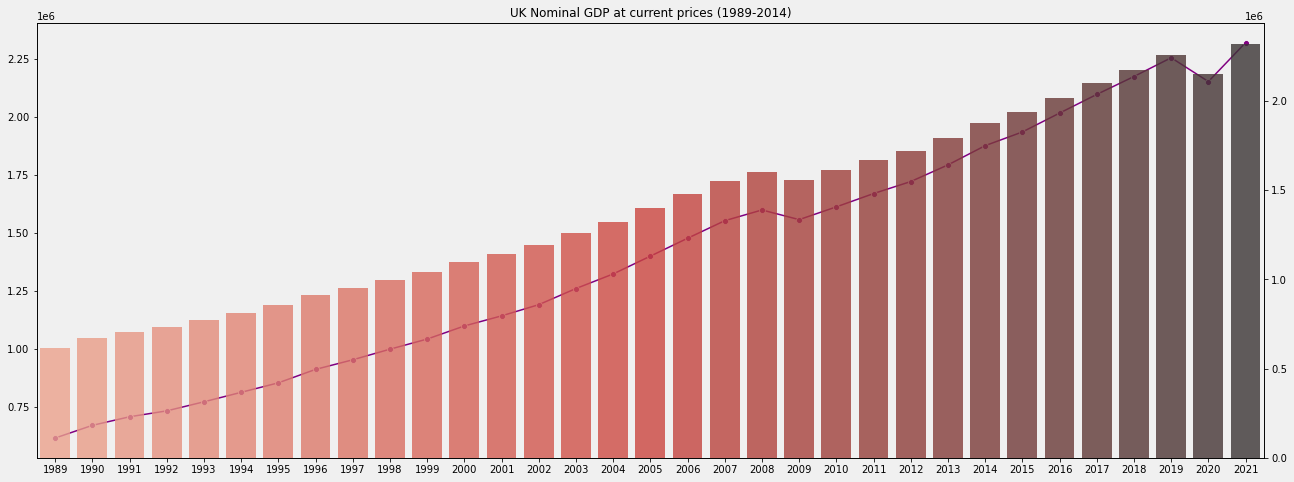

In [16]:
title = "UK Nominal GDP at current prices (1989-2014)"
ax1 = sns.set_style(style=None, rc=None )


fig, ax1 = plt.subplots(figsize=(22,8))

sns.lineplot(data = uk_gdp1["Nominal GDP at current prices"].rename(""), marker='o', sort = False,color = 'purple', ax=ax1).set(title=title)
ax2 = ax1.twinx()
pal = sns.color_palette("Reds_d",len(uk_gdp1))
my_color2="0.94"
ax1.set_facecolor(my_color2)
fig.set_facecolor(my_color2)


sns.barplot(data = uk_gdp1,x = uk_gdp1["Year"], y = uk_gdp1["Nominal GDP at current prices"].rename(""),palette = pal ,alpha=0.8, ax=ax2)
plt.savefig("uk_gdp_visual_bar_line.png")

#### CPI & PPI

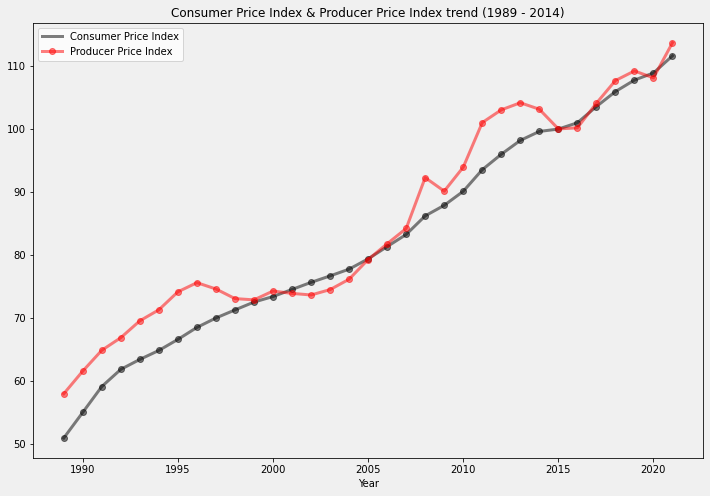

In [17]:
curr_fig, curr_ax = plt.subplots(figsize=(14, 8))


my_color2="0.94"
curr_ax.set_facecolor(my_color2)
curr_fig.set_facecolor(my_color2)


title = "Consumer Price Index & Producer Price Index trend (1989 - 2014)"
UK["CPI"].rename("Consumer Price Index").groupby(by =UK["Year"]).mean().plot(legend = True, figsize = (18,10), c = "black", lw = 3, alpha = 0.5, marker = "o")
UK["PPI (2015-base)"].rename("Producer Price Index").groupby(by =UK["Year"]).mean().plot(legend = True, figsize = (12,8), c = "r", title = title, alpha = 0.5, lw = 3, marker = "o")
plt.savefig("uk_CPI_PPI_visual.png")

In [18]:
uk_UR = UK["Unemployment rate"].groupby(by = UK["Year"]).mean()
uk_UR = pd.DataFrame(uk_UR)
uk_UR.reset_index(drop = True, inplace = True)
year = pd. Series(UK["Year"])
year = year.drop_duplicates()
year.reset_index(drop = True, inplace = True)
uk_UR = pd.concat([uk_UR,year], axis = 1)
uk_UR

Unemployment rate  Year
0              7.2225  1989
1              7.0900  1990
2              8.8250  1991
3              9.9650  1992
4             10.4000  1993
5              9.4975  1994
6              8.6575  1995
7              8.1175  1996
8              6.9850  1997
9              6.2675  1998
10             5.9825  1999
11             5.4500  2000
12             5.0850  2001
13             5.1750  2002
14             5.0075  2003
15             4.7500  2004
16             4.8425  2005
17             5.4175  2006
18             5.3325  2007
19             5.7075  2008
20             7.6100  2009
21             7.8900  2010
22             8.0925  2011
23             8.0000  2012
24             7.5950  2013
25             6.2000  2014
26             5.3825  2015
27             4.9200  2016
28             4.3500  2017
29             4.0700  2018
30             3.8350  2019
31             4.5125  2020
32             4.1550  2021

#### Unemployment rate

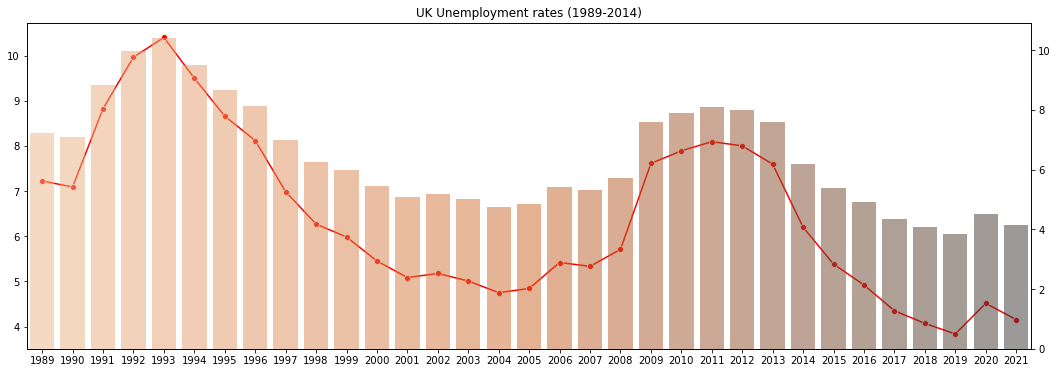

In [19]:
title = "UK Unemployment rates (1989-2014)"
ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(18,6))

sns.lineplot(data = uk_UR["Unemployment rate"].rename(""), marker='o', sort = False,color = 'r', ax=ax1).set(title=title)
ax2 = ax1.twinx()

pal = sns.color_palette("Oranges_d", len(uk_UR))
sns.barplot(data = uk_UR,x = uk_UR["Year"], y = uk_UR["Unemployment rate"].rename(""),palette = pal ,alpha=0.5, ax=ax2)
plt.savefig("uk_UR_visual_bar_line.png")

#### FTSE

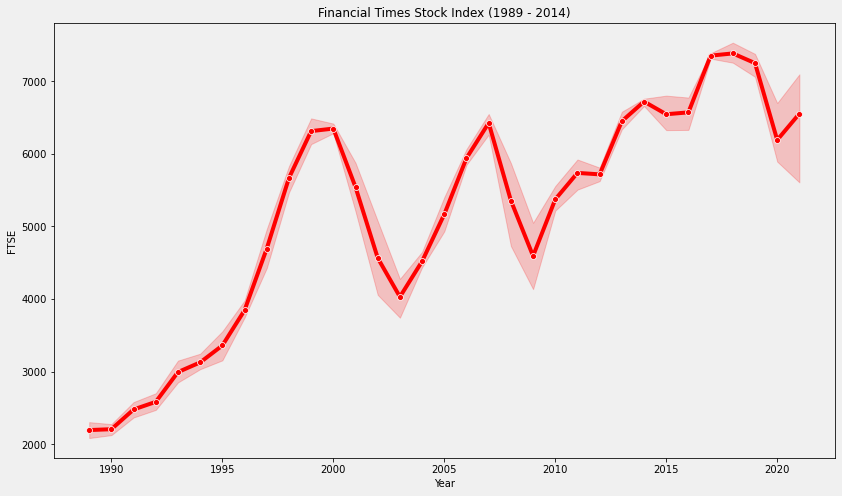

In [20]:
curr_fig, curr_ax = plt.subplots(figsize=(14, 8))


my_color2="0.94"
curr_ax.set_facecolor(my_color2)
curr_fig.set_facecolor(my_color2)


title = "Financial Times Stock Index (1989 - 2014)"


sns.lineplot(x = UK["Year"], y = UK["FTSE"], marker = "o", lw = 4, color = "r").set(title=title)

plt.savefig("uk_FTSE_line.png")

In [21]:
UK_integers = UK.drop(["Year/Q","Year","Quarter"], axis = 1)

#### As first indication for the relationship between the variables is a simple seaborn Pair plot, that gives us better representation of the data and we can conclude that the Unemployment rate – though theoretically in a negative linear relationship with Inflation in this dataset gives us no clear relationship with the Consumer Price Index as it portrays a spiral line. The FTSE also has some unclear representation of the relationship with CPI, but there is some indication about a possible upward trend. Nominal GDP and Producer Price Index both have a clear linear relationship with CPI, volatility is more obvious in the PPI - CPI relationship. Finally, the Bank Rate shows a negative relationship. These variables will be further inspected in order to determine their input in the Models.  

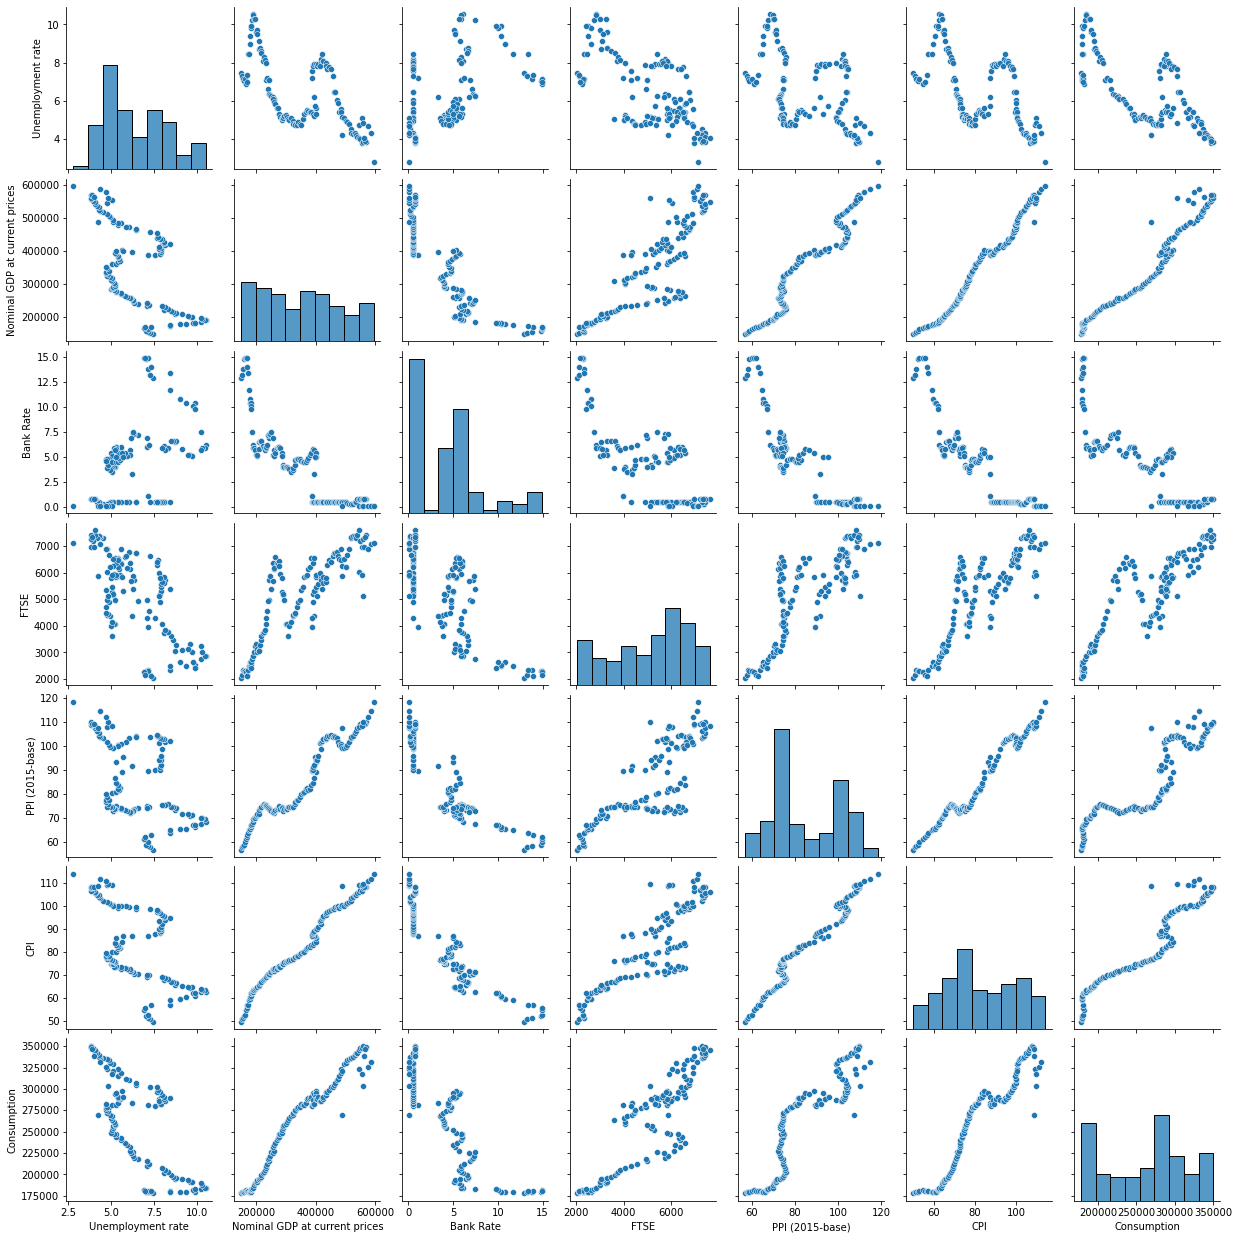

In [22]:
sns.pairplot(UK_integers)
plt.savefig("Pairplot_UK.png")

#### The correlation matrix on the other hand, displays better insights about strong and significant relationships, one of which quite obvious Nominal GDP & CPI – 0,98.

<AxesSubplot:>

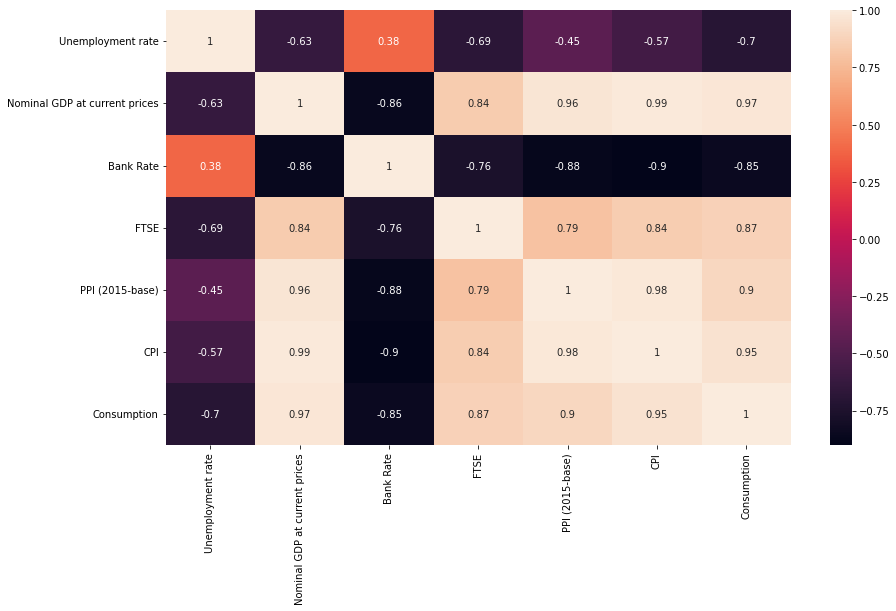

In [23]:
curr_fig, curr_ax = plt.subplots(figsize=(14, 8))


my_color2="white"
curr_fig.set_facecolor(my_color2)

sns.heatmap(UK_integers.corr(), annot = True)

#### The dataset is split in 2 parts: Linear Regression Model (1989-2014) & SarimaX – Time Series Model (2015 – 2021) due to high volatility in the later years and the fact that the CPI data points are not a chained series and the base year index is set to 2015 – 100, compared to which all other quarterly indices are calculated.

In [24]:
UK

Year/Q  Year Quarter  Unemployment rate  Nominal GDP at current prices  \
0    1989T1  1989      T1               7.43                       148788.0   
1    1989T2  1989      T2               7.30                       151553.0   
2    1989T3  1989      T3               7.13                       155702.0   
3    1989T4  1989      T4               7.03                       159082.0   
4    1990T1  1990      T1               7.13                       162445.0   
..      ...   ...     ...                ...                            ...   
127  2020T4  2020      T4               5.07                       555343.0   
128  2021T1  2021      T1               4.83                       558974.0   
129  2021T2  2021      T2               4.68                       578182.0   
130  2021T3  2021      T3               4.33                       587198.0   
131  2021T4  2021      T4               2.78                       595875.0   

     Bank Rate     FTSE  PPI (2015-base)    CPI  Consumption  
0        12.88  2043.07            56.90   49.8     177734.0  
1        13.23  2127.80            57.80   50.8     179115.0  
2        13.76  2328.10            58.30   51.2     179002.0  
3        14.81  2280.70            59.00   52.1     179540.0  
4        14.88  2280.20            60.00   52.8     180045.0  
..         ...      ...              ...    ...          ...  
127       0.10  5903.19           108.30  109.3     317465.0  
128       0.10  5120.82           110.10  109.5     303433.0  
129       0.10  6902.02           111.90  110.9     325257.0  
130       0.10  7063.16           114.60  112.0     331809.0  
131       0.10  7127.81           118.23  114.1          NaN  

[132 rows x 10 columns]

In [25]:
UK2 = UK[104:]

In [26]:
UK2

Year/Q  Year Quarter  Unemployment rate  Nominal GDP at current prices  \
104  2015T1  2015      T1               5.43                       477905.0   
105  2015T2  2015      T2               5.57                       484417.0   
106  2015T3  2015      T3               5.40                       485426.0   
107  2015T4  2015      T4               5.13                       487464.0   
108  2016T1  2016      T1               5.10                       494378.0   
109  2016T2  2016      T2               4.93                       502284.0   
110  2016T3  2016      T3               4.87                       506555.0   
111  2016T4  2016      T4               4.78                       513421.0   
112  2017T1  2017      T1               4.50                       518393.0   
113  2017T2  2017      T2               4.33                       521074.0   
114  2017T3  2017      T3               4.27                       525019.0   
115  2017T4  2017      T4               4.30                       532657.0   
116  2018T1  2018      T1               4.20                       535884.0   
117  2018T2  2018      T2               4.07                       540904.0   
118  2018T3  2018      T3               4.04                       546802.0   
119  2018T4  2018      T4               3.97                       550790.0   
120  2019T1  2019      T1               3.80                       557249.0   
121  2019T2  2019      T2               3.84                       561476.0   
122  2019T3  2019      T3               3.82                       568439.0   
123  2019T4  2019      T4               3.88                       568119.0   
124  2020T1  2020      T1               4.03                       562218.0   
125  2020T2  2020      T2               4.21                       488582.0   
126  2020T3  2020      T3               4.74                       546503.0   
127  2020T4  2020      T4               5.07                       555343.0   
128  2021T1  2021      T1               4.83                       558974.0   
129  2021T2  2021      T2               4.68                       578182.0   
130  2021T3  2021      T3               4.33                       587198.0   
131  2021T4  2021      T4               2.78                       595875.0   

     Bank Rate     FTSE  PPI (2015-base)    CPI  Consumption  
104       0.50  6526.60           100.30   99.4     315311.0  
105       0.50  6906.03           100.80  100.0     318479.0  
106       0.50  6488.40            99.90  100.2     323512.0  
107       0.50  6259.60            99.10  100.4     320544.0  
108       0.50  6518.76            99.00  100.1     328618.0  
109       0.50  6215.86            99.50  100.8     330747.0  
110       0.34  6670.09           100.50  101.2     334042.0  
111       0.25  6879.11           101.80  101.9     334804.0  
112       0.25  7290.92           103.10  102.3     336609.0  
113       0.25  7348.94           103.50  103.4     335856.0  
114       0.25  7371.78           104.30  103.9     337387.0  
115       0.50  7397.50           105.50  104.7     339051.0  
116       0.50  7305.10           106.10  104.8     342110.0  
117       0.75  7414.70           107.50  105.8     342497.0  
118       0.75  7606.04           108.30  106.3     345379.0  
119       0.75  7206.18           108.90  106.9     347475.0  
120       0.75  6969.72           108.50  106.7     347518.0  
121       0.75  7286.37           109.50  107.8     350422.0  
122       0.75  7406.53           109.80  108.2     349391.0  
123       0.75  7334.37           109.10  108.4     347126.0  
124       0.75  6964.71           108.90  108.5     338165.0  
125       0.10  5883.26           107.40  108.7     269571.0  
126       0.10  6010.36           107.90  109.1     323229.0  
127       0.10  5903.19           108.30  109.3     317465.0  
128       0.10  5120.82           110.10  109.5     303433.0  
129       0.10  6902.02           111.90  110.9     325257.0  
130       0.

In [27]:
UK.tail(10)

Year/Q  Year Quarter  Unemployment rate  Nominal GDP at current prices  \
122  2019T3  2019      T3               3.82                       568439.0   
123  2019T4  2019      T4               3.88                       568119.0   
124  2020T1  2020      T1               4.03                       562218.0   
125  2020T2  2020      T2               4.21                       488582.0   
126  2020T3  2020      T3               4.74                       546503.0   
127  2020T4  2020      T4               5.07                       555343.0   
128  2021T1  2021      T1               4.83                       558974.0   
129  2021T2  2021      T2               4.68                       578182.0   
130  2021T3  2021      T3               4.33                       587198.0   
131  2021T4  2021      T4               2.78                       595875.0   

     Bank Rate     FTSE  PPI (2015-base)    CPI  Consumption  
122       0.75  7406.53           109.80  108.2     349391.0  
123       0.75  7334.37           109.10  108.4     347126.0  
124       0.75  6964.71           108.90  108.5     338165.0  
125       0.10  5883.26           107.40  108.7     269571.0  
126       0.10  6010.36           107.90  109.1     323229.0  
127       0.10  5903.19           108.30  109.3     317465.0  
128       0.10  5120.82           110.10  109.5     303433.0  
129       0.10  6902.02           111.90  110.9     325257.0  
130       0.10  7063.16           114.60  112.0     331809.0  
131       0.10  7127.81           118.23  114.1          NaN

In [28]:
UK.drop(UK.index[104:], axis = 0, inplace = True)

In [29]:
UK

Year/Q  Year Quarter  Unemployment rate  Nominal GDP at current prices  \
0    1989T1  1989      T1               7.43                       148788.0   
1    1989T2  1989      T2               7.30                       151553.0   
2    1989T3  1989      T3               7.13                       155702.0   
3    1989T4  1989      T4               7.03                       159082.0   
4    1990T1  1990      T1               7.13                       162445.0   
..      ...   ...     ...                ...                            ...   
99   2013T4  2013      T4               7.27                       457399.0   
100  2014T1  2014      T1               6.47                       462605.0   
101  2014T2  2014      T2               6.43                       466628.0   
102  2014T3  2014      T3               6.03                       472925.0   
103  2014T4  2014      T4               5.87                       474004.0   

     Bank Rate     FTSE  PPI (2015-base)    CPI  Consumption  
0        12.88  2043.07             56.9   49.8     177734.0  
1        13.23  2127.80             57.8   50.8     179115.0  
2        13.76  2328.10             58.3   51.2     179002.0  
3        14.81  2280.70             59.0   52.1     179540.0  
4        14.88  2280.20             60.0   52.8     180045.0  
..         ...      ...              ...    ...          ...  
99        0.50  6614.74            103.8   98.9     302681.0  
100       0.50  6743.84            103.9   99.0     304264.0  
101       0.50  6740.97            103.8   99.7     306925.0  
102       0.50  6764.60            103.3   99.8     310673.0  
103       0.50  6630.60            101.6  100.0     311591.0  

[104 rows x 10 columns]

#### Model 1 - MULTIPLE LINEAR REGRESSION MODEL

In [30]:
UK

Year/Q  Year Quarter  Unemployment rate  Nominal GDP at current prices  \
0    1989T1  1989      T1               7.43                       148788.0   
1    1989T2  1989      T2               7.30                       151553.0   
2    1989T3  1989      T3               7.13                       155702.0   
3    1989T4  1989      T4               7.03                       159082.0   
4    1990T1  1990      T1               7.13                       162445.0   
..      ...   ...     ...                ...                            ...   
99   2013T4  2013      T4               7.27                       457399.0   
100  2014T1  2014      T1               6.47                       462605.0   
101  2014T2  2014      T2               6.43                       466628.0   
102  2014T3  2014      T3               6.03                       472925.0   
103  2014T4  2014      T4               5.87                       474004.0   

     Bank Rate     FTSE  PPI (2015-base)    CPI  Consumption  
0        12.88  2043.07             56.9   49.8     177734.0  
1        13.23  2127.80             57.8   50.8     179115.0  
2        13.76  2328.10             58.3   51.2     179002.0  
3        14.81  2280.70             59.0   52.1     179540.0  
4        14.88  2280.20             60.0   52.8     180045.0  
..         ...      ...              ...    ...          ...  
99        0.50  6614.74            103.8   98.9     302681.0  
100       0.50  6743.84            103.9   99.0     304264.0  
101       0.50  6740.97            103.8   99.7     306925.0  
102       0.50  6764.60            103.3   99.8     310673.0  
103       0.50  6630.60            101.6  100.0     311591.0  

[104 rows x 10 columns]

#### Calculation of Pearson correlation coefficient and the p-values

In [31]:
from scipy import stats

##### Nominal GDP & Unemployment rate

In [32]:
pearson_coef_ur, p_value_ur = stats.pearsonr(UK["Unemployment rate"], UK["CPI"])

In [33]:
pearson_coef_ur

-0.2750493723077695

##### Nominal GDP & CPI

In [34]:
pearson_coef_gdp, p_value_gdp = stats.pearsonr(UK["Nominal GDP at current prices"], UK["CPI"])

##### Bank rate & CPI

In [35]:
pearson_coef_br, p_value_br = stats.pearsonr(UK["Bank Rate"], UK["CPI"])

##### FTSE & CPI

In [36]:
pearson_coef_ftse, p_value_ftse = stats.pearsonr(UK["FTSE"], UK["CPI"])

##### PPI & CPI

In [37]:
pearson_coef_ppi, p_value_ppi = stats.pearsonr(UK["PPI (2015-base)"], UK["CPI"])

In [38]:
pearson_all = pd.DataFrame([pearson_coef_ur,pearson_coef_gdp,pearson_coef_br,pearson_coef_ftse,pearson_coef_ppi])

In [39]:
pearson_all = pearson_all.transpose()

In [40]:
pearson_all.columns = ["Unemployment rate", "GDP", "Bank rate", "FTSE", "PPI"]

In [41]:
pearson_all.index = ["Pearson Coefficient"]

In [42]:
pearson_all

Unemployment rate       GDP  Bank rate      FTSE  \
Pearson Coefficient          -0.275049  0.981644  -0.904763  0.794977   

                          PPI  
Pearson Coefficient  0.967414

In [43]:
pValues_all = pd.DataFrame([p_value_ur,p_value_gdp,p_value_br,p_value_ftse,p_value_ppi])

In [44]:
pValues_all = pValues_all.transpose()

In [45]:
pValues_all.index = ["P Value"]

In [46]:
pValues_all.columns = ["Unemployment rate", "GDP", "Bank rate", "FTSE", "PPI"]
pValues_all

Unemployment rate           GDP     Bank rate          FTSE  \
P Value           0.004717  3.201542e-75  1.349250e-39  7.125211e-24   

                  PPI  
P Value  1.157962e-62

In [47]:
pc_pVal = pd. concat([pearson_all,pValues_all], axis = 0)

In [48]:
pc_pVal

Unemployment rate           GDP     Bank rate  \
Pearson Coefficient          -0.275049  9.816441e-01 -9.047630e-01   
P Value                       0.004717  3.201542e-75  1.349250e-39   

                             FTSE           PPI  
Pearson Coefficient  7.949766e-01  9.674144e-01  
P Value              7.125211e-24  1.157962e-62

#### All variables signal strong linear relationships according to the Pearson Coefficient, except for the Unemployment rate with a value of -0.25 which doesn’t really show significance. Therefore, this variable will not be used for predictions even though the p-value is below 0.005.

#### Train – Test Split
##### The data is sliced in train [CPI [1989-2008]] and test [CPI [2009-2014]] split, after Linear Regression is instanced the model is trained, fitted and used for prediction on the test set

In [49]:
X_train = UK.head(80)
X_test = UK.tail(24)

In [50]:
X_train

Year/Q  Year Quarter  Unemployment rate  Nominal GDP at current prices  \
0   1989T1  1989      T1               7.43                       148788.0   
1   1989T2  1989      T2               7.30                       151553.0   
2   1989T3  1989      T3               7.13                       155702.0   
3   1989T4  1989      T4               7.03                       159082.0   
4   1990T1  1990      T1               7.13                       162445.0   
..     ...   ...     ...                ...                            ...   
75  2007T4  2007      T4               5.20                       394824.0   
76  2008T1  2008      T1               5.63                       401905.0   
77  2008T2  2008      T2               5.30                       401222.0   
78  2008T3  2008      T3               5.70                       399608.0   
79  2008T4  2008      T4               6.20                       396017.0   

    Bank Rate     FTSE  PPI (2015-base)   CPI  Consumption  
0       12.88  2043.07             56.9  49.8     177734.0  
1       13.23  2127.80             57.8  50.8     179115.0  
2       13.76  2328.10             58.3  51.2     179002.0  
3       14.81  2280.70             59.0  52.1     179540.0  
4       14.88  2280.20             60.0  52.8     180045.0  
..        ...      ...              ...   ...          ...  
75       5.68  6536.98             86.6  84.1     293962.0  
76       5.35  5822.06             89.0  84.5     297234.0  
77       5.03  5922.23             93.2  86.1     294925.0  
78       5.00  5316.99             95.3  87.1     290238.0  
79       3.32  4366.51             91.7  87.2     283236.0  

[80 rows x 10 columns]

In [51]:
X_test

Year/Q  Year Quarter  Unemployment rate  Nominal GDP at current prices  \
80   2009T1  2009      T1               7.17                       387161.0   
81   2009T2  2009      T2               7.57                       388507.0   
82   2009T3  2009      T3               7.87                       391683.0   
83   2009T4  2009      T4               7.83                       389769.0   
84   2010T1  2010      T1               7.93                       396167.0   
85   2010T2  2010      T2               7.93                       402860.0   
86   2010T3  2010      T3               7.80                       405279.0   
87   2010T4  2010      T4               7.90                       407889.0   
88   2011T1  2011      T1               7.97                       416879.0   
89   2011T2  2011      T2               7.80                       413451.0   
90   2011T3  2011      T3               8.17                       417461.0   
91   2011T4  2011      T4               8.43                       421718.0   
92   2012T1  2012      T1               8.10                       424148.0   
93   2012T2  2012      T2               8.10                       426054.0   
94   2012T3  2012      T3               7.97                       434775.0   
95   2012T4  2012      T4               7.83                       436378.0   
96   2013T1  2013      T1               7.67                       439170.0   
97   2013T2  2013      T2               7.77                       443633.0   
98   2013T3  2013      T3               7.67                       452953.0   
99   2013T4  2013      T4               7.27                       457399.0   
100  2014T1  2014      T1               6.47                       462605.0   
101  2014T2  2014      T2               6.43                       466628.0   
102  2014T3  2014      T3               6.03                       472925.0   
103  2014T4  2014      T4               5.87                       474004.0   

     Bank Rate     FTSE  PPI (2015-base)    CPI  Consumption  
80        1.08  3968.62             89.5   87.0     281305.0  
81        0.50  4303.62             89.8   87.8     279930.0  
82        0.50  4883.72             90.1   88.2     282822.0  
83        0.50  5216.04             91.2   88.6     286912.0  
84        0.50  5301.26             92.1   89.1     282533.0  
85        0.50  5473.79             94.1   90.0     288462.0  
86        0.50  5133.37             94.0   90.3     288531.0  
87        0.50  5584.02             95.6   91.1     290445.0  
88        0.50  5848.80             98.9   92.2     287063.0  
89        0.50  5989.55            101.3   93.4     285724.0  
90        0.50  5718.48            101.8   93.9     286142.0  
91        0.50  5392.71            102.1   94.7     288898.0  
92        0.50  5823.03            102.9   95.1     288635.0  
93        0.50  5609.03            103.0   95.8     290659.0  
94        0.50  5639.30            103.0   96.1     292925.0  
95        0.50  5797.20            103.3   97.0     296553.0  
96        0.50  6291.19            104.3   97.4     295836.0  
97        0.50  6474.98            103.9   98.1     298755.0  
98        0.50  6416.49            104.7   98.4     302391.0  
99        0.50  6614.74            103.8   98.9     302681.0  
100       0.50  6743.84            103.9   99.0     304264.0  
101       0.50  6740.97            103.8   99.7     306925.0  
102       0.50  6764.60            103.3   99.8     310673.0  
103       0.50  6630.60            101.6  100.0     311591.0

In [52]:
y_train = X_train["CPI"]
X_train = X_train[["Nominal GDP at current prices", "Bank Rate", "FTSE", "PPI (2015-base)"]]

y_test = X_test["CPI"]
X_test = X_test[["Nominal GDP at current prices", "Bank Rate", "FTSE", "PPI (2015-base)"]]

In [53]:
X_train

Nominal GDP at current prices  Bank Rate     FTSE  PPI (2015-base)
0                        148788.0      12.88  2043.07             56.9
1                        151553.0      13.23  2127.80             57.8
2                        155702.0      13.76  2328.10             58.3
3                        159082.0      14.81  2280.70             59.0
4                        162445.0      14.88  2280.20             60.0
..                            ...        ...      ...              ...
75                       394824.0       5.68  6536.98             86.6
76                       401905.0       5.35  5822.06             89.0
77                       401222.0       5.03  5922.23             93.2
78                       399608.0       5.00  5316.99             95.3
79                       396017.0       3.32  4366.51             91.7

[80 rows x 4 columns]

In [54]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept = True)
regressor.fit(X_train, y_train)
y_predict = regressor.predict(X_test)

In [55]:
y_predict.shape, y_test.shape

((24,), (24,))

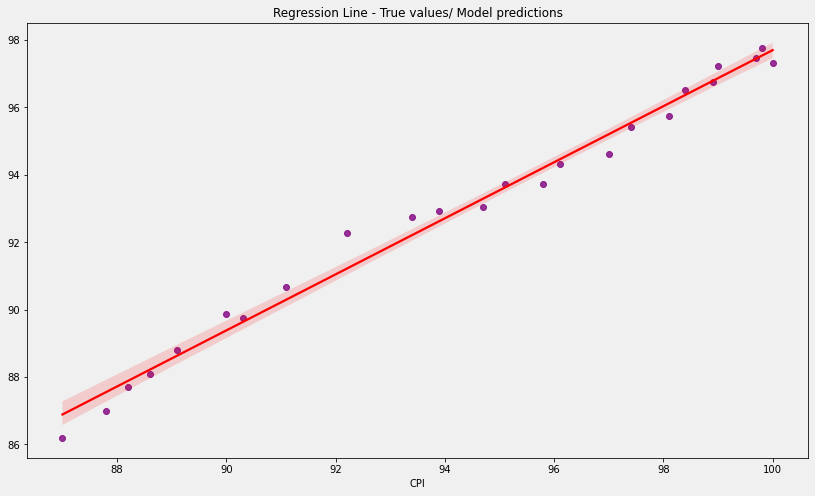

In [56]:
x = y_test
y = y_predict
fig, ax = plt.subplots(figsize=(14, 8))
my_color2="0.94"
ax.set_facecolor(my_color2)
fig.set_facecolor(my_color2)

ax1 = sns.regplot(x,y,scatter_kws={"color": "purple"}, line_kws={"color": "red"})
plt.title("Regression Line - True values/ Model predictions")
plt.show();
fig = ax1.get_figure()
fig.savefig("REG_plot.png")

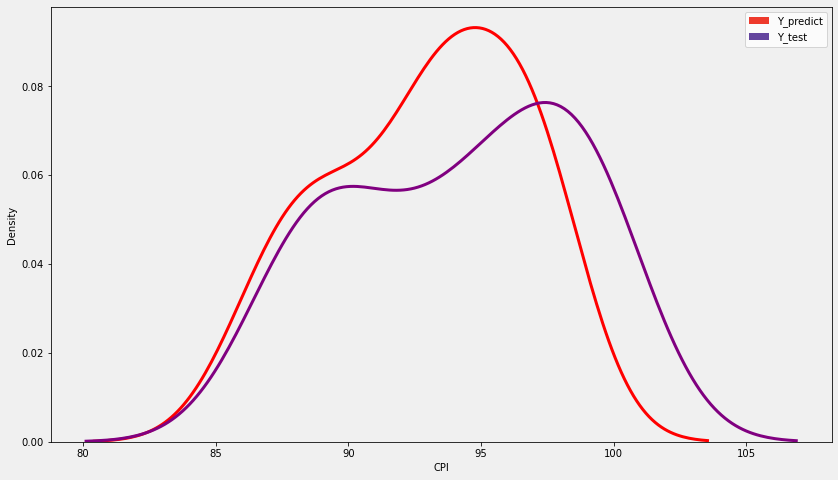

In [57]:
fig, ax = plt.subplots(figsize=(14, 8))
my_color2="0.94"
ax.set_facecolor(my_color2)
fig.set_facecolor(my_color2)


ax12 = sns.kdeplot(data = regressor, x = y_predict, color = "r", lw = 3)
ax12 = sns.kdeplot(data = regressor, x = y_test, color = "purple", lw = 3)
handles = [mpatches.Patch(facecolor=plt.cm.Reds(160), label="Y_predict"),
           mpatches.Patch(facecolor=plt.cm.Purples(200), label="Y_test")]
plt.legend(handles=handles)

plt.show();
fig = ax12.get_figure()
fig.savefig("KDE_plot.png")

In [58]:
y_test

80      87.0
81      87.8
82      88.2
83      88.6
84      89.1
85      90.0
86      90.3
87      91.1
88      92.2
89      93.4
90      93.9
91      94.7
92      95.1
93      95.8
94      96.1
95      97.0
96      97.4
97      98.1
98      98.4
99      98.9
100     99.0
101     99.7
102     99.8
103    100.0
Name: CPI, dtype: float64

#### Metrics for model evaluation

In [59]:
print('Linear Model Coeff b1', regressor.coef_)
print('Linear Model Coeff b0', regressor.intercept_)

Linear Model Coeff b1 [ 6.65545523e-05 -6.61854096e-01  7.50663487e-04  2.45928260e-01]
Linear Model Coeff b0 36.14777916895706


In [60]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [61]:
r2 = r2_score(y_test, y_predict)
k = X_test.shape[1]
n = len(X_test)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)
MSE = mean_squared_error(y_test, y_predict)
RMSE = np.sqrt(MSE)
print("RMSE = ",RMSE, '\nMSE = ', MSE, '\nR2 = ', r2, '\nAdjustedR2 = ', adj_r2)

RMSE =  1.5625104547130062 
MSE =  2.4414389210874456 
R2 =  0.8643247230528273 
AdjustedR2 =  0.8357615068534224


In [62]:
dict1 = {"RMSE": RMSE, "MSE" : MSE, 'R_squared': r2, "Adjusted_R_squared": adj_r2}

In [63]:
dict1 = pd.Series(dict1)

In [64]:
dict1 = pd.DataFrame(dict1)

In [65]:
dict1

0
RMSE                1.562510
MSE                 2.441439
R_squared           0.864325
Adjusted_R_squared  0.835762

#### Forecast based on input values (not part of the dataset)

In [66]:
UK2.head(4)

Year/Q  Year Quarter  Unemployment rate  Nominal GDP at current prices  \
104  2015T1  2015      T1               5.43                       477905.0   
105  2015T2  2015      T2               5.57                       484417.0   
106  2015T3  2015      T3               5.40                       485426.0   
107  2015T4  2015      T4               5.13                       487464.0   

     Bank Rate     FTSE  PPI (2015-base)    CPI  Consumption  
104        0.5  6526.60            100.3   99.4     315311.0  
105        0.5  6906.03            100.8  100.0     318479.0  
106        0.5  6488.40             99.9  100.2     323512.0  
107        0.5  6259.60             99.1  100.4     320544.0

In [67]:
new_input1 = [[477905.0,0.50,6526.60,100.3]]
new_input2 = [[484417.0,0.50,6906.03,100.8]]
new_input3 = [[485426.0,0.50,6488.40,99.9]]
new_input4 = [[487464.0,0.50,6259.60,99.1]]

In [68]:
new_output1 = regressor.predict(new_input1)
new_output1 ## True value is 99,4

array([97.18949017])

In [69]:
new_output2 = regressor.predict(new_input2)
new_output2 ## True value is 100,00

array([98.03068179])

In [70]:
new_output3 = regressor.predict(new_input3)
new_output3 ## True value is 100,20

array([97.56300031])

In [71]:
new_output4 = regressor.predict(new_input4)
new_output4 ## True value is 100,40

array([97.33014408])

In [72]:
# Additional model evaluation

In [73]:
from sklearn.model_selection import cross_val_score

In [74]:
regressor = LinearRegression()

In [75]:
UK.tail()

Year/Q  Year Quarter  Unemployment rate  Nominal GDP at current prices  \
99   2013T4  2013      T4               7.27                       457399.0   
100  2014T1  2014      T1               6.47                       462605.0   
101  2014T2  2014      T2               6.43                       466628.0   
102  2014T3  2014      T3               6.03                       472925.0   
103  2014T4  2014      T4               5.87                       474004.0   

     Bank Rate     FTSE  PPI (2015-base)    CPI  Consumption  
99         0.5  6614.74            103.8   98.9     302681.0  
100        0.5  6743.84            103.9   99.0     304264.0  
101        0.5  6740.97            103.8   99.7     306925.0  
102        0.5  6764.60            103.3   99.8     310673.0  
103        0.5  6630.60            101.6  100.0     311591.0

In [76]:
x = UK[["Nominal GDP at current prices", "Bank Rate", "FTSE", "PPI (2015-base)"]]
y = UK["CPI"]

In [77]:
Rcross = cross_val_score(regressor, x, y, cv = 4)

In [78]:
Rcross

array([0.86506623, 0.40094725, 0.77686856, 0.8258499 ])

In [79]:
print ("The mean of the folds is: ", Rcross.mean(), "and the standard deviation is: ", Rcross.std() )

The mean of the folds is:  0.7171829844182804 and the standard deviation is:  0.18523320365255574


#### Ridge & Lasso regression - Two methods we can use to get around this issue of multicollinearity are ridge and lasso regression. Both are known as regularization methods because they both attempt to minimize the sum of squared residuals (RSS) along with some penalty term

In [80]:
# Ridge Regression

In [81]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold
from numpy import arange

In [82]:
cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)

In [83]:
model = RidgeCV(alphas=arange(0, 1, 0.01), cv=cv, scoring='neg_mean_absolute_error')

In [84]:
model.fit(X_train, y_train)

RidgeCV(alphas=array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99]),
        cv=RepeatedKFold(n_repeats=2, n_splits=5, random_state=1),
        scoring='neg_mean_absolute_error')

In [85]:
print(model.alpha_)

0.99


In [86]:
from sklearn.linear_model import Lasso, Ridge
regressor_Ridge = Ridge(alpha = 0.99)
regressor_Ridge.fit(X_train, y_train)
print("Coefficient b1:", regressor_Ridge.coef_)
print("Coefficient b0:", regressor_Ridge.intercept_)

y_predict1 = regressor_Ridge.predict(X_test)
y_predict1

Coefficient b1: [ 6.65813715e-05 -6.59971347e-01  7.51545633e-04  2.46101220e-01]
Coefficient b0: 36.111427769566504


array([86.18502734, 86.9830274 , 87.70429183, 88.09732007, 88.8088455 ,
       89.87634123, 89.75695028, 90.66317365, 92.27286846, 92.7410505 ,
       92.92737093, 93.03980718, 93.721886  , 93.71256945, 94.31597488,
       94.61520424, 95.41845668, 95.75529542, 96.52875688, 96.75228048,
       97.22053776, 97.46162756, 97.77559887, 97.32836098])

In [87]:
y_test

80      87.0
81      87.8
82      88.2
83      88.6
84      89.1
85      90.0
86      90.3
87      91.1
88      92.2
89      93.4
90      93.9
91      94.7
92      95.1
93      95.8
94      96.1
95      97.0
96      97.4
97      98.1
98      98.4
99      98.9
100     99.0
101     99.7
102     99.8
103    100.0
Name: CPI, dtype: float64

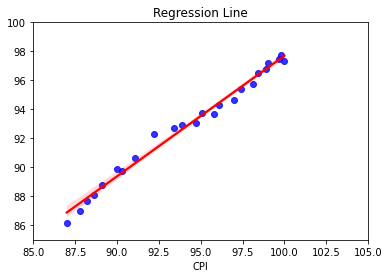

In [88]:
x1 = y_test
y1 = y_predict1
ax = sns.regplot(x1,y1,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title("Regression Line")
plt.xlim(85, 105)
plt.ylim(85, 100)
plt.show()

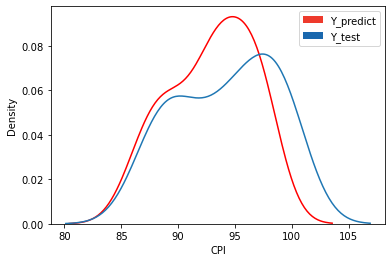

In [89]:
sns.kdeplot(data = regressor_Ridge, x = y_predict1, color = "r")
sns.kdeplot(data = regressor_Ridge, x = y_test)
handles = [mpatches.Patch(facecolor=plt.cm.Reds(160), label="Y_predict"),
           mpatches.Patch(facecolor=plt.cm.Blues(200), label="Y_test")]
plt.legend(handles=handles)
plt.show()

In [90]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
r2 = r2_score(y_test, y_predict1)
k = X_test.shape[1]
n = len(X_test)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)
MSE = mean_squared_error(y_test, y_predict1)
RMSE = np.sqrt(MSE)

print("RMSE = ",RMSE, '\nMSE = ', MSE, '\nR2 = ', r2, '\nAdjustedR2 = ', adj_r2)

RMSE =  1.5630526915128478 
MSE =  2.4431337164455575 
R2 =  0.8642305401397941 
AdjustedR2 =  0.835647495958698


In [91]:
# Lasso Regression

In [92]:
from numpy import arange
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold

In [93]:
cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)

In [94]:
model = LassoCV(alphas=arange(0, 1, 0.01), cv=cv, n_jobs=-1)

In [95]:
model.fit(X_train, y_train)

LassoCV(alphas=array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99]),
        cv=RepeatedKFold(n_repeats=2, n_splits=5, random_state=1), n_jobs=-1)

In [96]:
print(model.alpha_)

0.01


In [97]:
from sklearn.linear_model import Lasso
regressor_Lasso = Lasso(alpha = 0.01)
regressor_Lasso.fit(X_train, y_train)
print("Coefficient b1:", regressor_Lasso.coef_)
print("Coefficient b0:", regressor_Lasso.intercept_)

y_predict_Lasso = regressor_Lasso.predict(X_test)
y_predict_Lasso

Coefficient b1: [ 6.66352541e-05 -6.59927483e-01  7.51753005e-04  2.45483692e-01]
Coefficient b0: 36.141490068190684


array([86.18155244, 86.9794838 , 87.70085439, 88.09316913, 88.8045012 ,
       89.87115829, 89.75188884, 90.65735825, 92.26555453, 92.73209898,
       92.9182705 , 93.03068331, 93.71248829, 93.70316831, 94.30704992,
       94.60621314, 95.40910093, 95.74646528, 96.51992277, 96.74428282,
       97.21278563, 97.45415336, 97.76877763, 97.32261989])

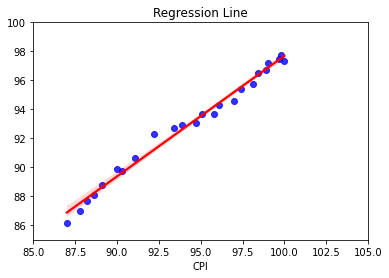

In [98]:
x2 = y_test
y2 = y_predict_Lasso
ax = sns.regplot(x2,y2,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title("Regression Line")
plt.xlim(85, 105)
plt.ylim(85, 100)
plt.show()

In [99]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
r2 = r2_score(y_test, y_predict_Lasso)
k = X_test.shape[1]
n = len(X_test)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)
MSE = mean_squared_error(y_test, y_predict_Lasso)
RMSE = np.sqrt(MSE)

print("RMSE = ",RMSE, '\nMSE = ', MSE, '\nR2 = ', r2, '\nAdjustedR2 = ', adj_r2)

RMSE =  1.5696839476484907 
MSE =  2.4639076955053496 
R2 =  0.8630760916963423 
AdjustedR2 =  0.8342500057376775


#### Model 2 - Time Series Anlysis

#### In this model we introduce the Bank Rate as the exogenous regressor with lagged values of 14 months, since it takes over a year before monetary policy actions have their peak effect on inflation. 

In [100]:
data = pd.read_excel(r"C:\Users\TEA\Desktop\tea\Data Science project\UK\BoE-Database_export.xlsx", index_col = "Date", parse_dates = True)

In [101]:
data = data.resample("M").mean()

In [102]:
data.reset_index(inplace = True)

In [103]:
data

Date  Bank Rate
0   2012-05-31   0.500000
1   2012-06-30   0.500000
2   2012-07-31   0.500000
3   2012-08-31   0.500000
4   2012-09-30   0.500000
..         ...        ...
116 2022-01-31   0.250000
117 2022-02-28   0.475000
118 2022-03-31   0.619565
119 2022-04-30   0.750000
120 2022-05-31   0.944444

[121 rows x 2 columns]

In [104]:
cpi = pd.read_excel(r"C:\Users\TEA\Desktop\tea\Data Science project\UK\CPI_monthly_series_1988-2022.xlsx")

In [105]:
cpi = cpi[463:]

In [106]:
cpi.reset_index(inplace = True)

In [107]:
dataset = pd.concat([data, cpi], axis = 1)

In [108]:
dataset

Date  Bank Rate  index      date  CPIH INDEX 00: ALL ITEMS 2015=100
0   2012-05-31   0.500000  463.0  2012 MAY                               95.9
1   2012-06-30   0.500000  464.0  2012 JUN                               95.6
2   2012-07-31   0.500000  465.0  2012 JUL                               95.7
3   2012-08-31   0.500000  466.0  2012 AUG                               96.1
4   2012-09-30   0.500000  467.0  2012 SEP                               96.4
..         ...        ...    ...       ...                                ...
116 2022-01-31   0.250000  579.0  2022 JAN                              114.6
117 2022-02-28   0.475000  580.0  2022 FEB                              115.4
118 2022-03-31   0.619565  581.0  2022 MAR                              116.5
119 2022-04-30   0.750000    NaN       NaN                                NaN
120 2022-05-31   0.944444    NaN       NaN                                NaN

[121 rows x 5 columns]

In [109]:
dataset.set_index("Date", inplace = True)

In [110]:
dataset.index.freq = "M"

In [111]:
dataset.index

DatetimeIndex(['2012-05-31', '2012-06-30', '2012-07-31', '2012-08-31',
               '2012-09-30', '2012-10-31', '2012-11-30', '2012-12-31',
               '2013-01-31', '2013-02-28',
               ...
               '2021-08-31', '2021-09-30', '2021-10-31', '2021-11-30',
               '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31',
               '2022-04-30', '2022-05-31'],
              dtype='datetime64[ns]', name='Date', length=121, freq='M')

In [112]:
dataset.drop(["date","index"], inplace = True, axis = 1)

#### Shifting the values of Bank rate 14 months backwards

In [113]:
dataset["BR(t-15)"] = dataset["Bank Rate"].shift(14)

In [114]:
dt = dataset["2015-01-31":]

In [115]:
dt.dropna(inplace = True)

In [116]:
# ETS Decomposition

In [117]:
dataset_noNA = dataset.dropna()

In [118]:
import matplotlib as mpl

In [119]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [120]:
results = seasonal_decompose(dataset_noNA["CPIH INDEX 00: ALL ITEMS 2015=100"], model = "additive")

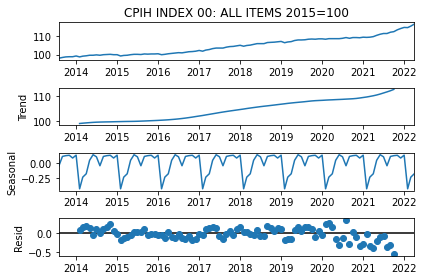

In [121]:
results.plot();

In [122]:
## Proof of Seasonality

In [123]:
dataset1 = pd.read_excel(r"C:\Users\TEA\Desktop\tea\Data Science project\Time Series Analysis\datase_inf_BR.xlsx")
dataset1.dropna(inplace = True)
dataset1

Date  Bank Rate  CPIH INDEX 00: ALL ITEMS 2015=100  BR(t-15)  \
15  2013-08-31   0.500000                               98.4       0.5   
16  2013-09-30   0.500000                               98.7       0.5   
17  2013-10-31   0.500000                               98.8       0.5   
18  2013-11-30   0.500000                               98.8       0.5   
19  2013-12-31   0.500000                               99.2       0.5   
..         ...        ...                                ...       ...   
114 2021-11-30   0.100000                              114.1       0.1   
115 2021-12-31   0.171429                              114.7       0.1   
116 2022-01-31   0.250000                              114.6       0.1   
117 2022-02-28   0.475000                              115.4       0.1   
118 2022-03-31   0.619565                              116.5       0.1   

     Monthly_inflation  Monthly_rate  
15            1.004082      0.408163  
16            1.003049      0.304878  
17            1.001013      0.101317  
18            1.000000      0.000000  
19            1.004049      0.404858  
..                 ...           ...  
114           1.006173      0.617284  
115           1.005259      0.525855  
116           0.999128     -0.087184  
117           1.006981      0.698080  
118           1.009532      0.953206  

[104 rows x 6 columns]

In [124]:
dataset.reset_index(drop = True, inplace = True)

In [125]:
dataset1 = dataset1[17:]

In [126]:
dataset1.reset_index(drop = True, inplace = True)
dataset1

Date  Bank Rate  CPIH INDEX 00: ALL ITEMS 2015=100  BR(t-15)  \
0  2015-01-31   0.500000                               99.2       0.5   
1  2015-02-28   0.500000                               99.5       0.5   
2  2015-03-31   0.500000                               99.6       0.5   
3  2015-04-30   0.500000                               99.9       0.5   
4  2015-05-31   0.500000                              100.1       0.5   
..        ...        ...                                ...       ...   
82 2021-11-30   0.100000                              114.1       0.1   
83 2021-12-31   0.171429                              114.7       0.1   
84 2022-01-31   0.250000                              114.6       0.1   
85 2022-02-28   0.475000                              115.4       0.1   
86 2022-03-31   0.619565                              116.5       0.1   

    Monthly_inflation  Monthly_rate  
0            0.992993     -0.700701  
1            1.003024      0.302419  
2            1.001005      0.100503  
3            1.003012      0.301205  
4            1.002002      0.200200  
..                ...           ...  
82           1.006173      0.617284  
83           1.005259      0.525855  
84           0.999128     -0.087184  
85           1.006981      0.698080  
86           1.009532      0.953206  

[87 rows x 6 columns]

In [127]:
widget = widgets.IntRangeSlider(value=[2015, 2022], min=2000, max=2028, step=1, description='Time Period:', 
        disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='d')
widget
#Prepare Data
years = widget.value
years = list(range(years[0],years[1]+1))
dataset1['Year'] = pd.DatetimeIndex(dataset1['Date']).year
dataset1['Month'] = [d.strftime('%b') for d in dataset1.Date]

In [128]:
from plotly.graph_objs import *
py.sign_in('', '')

In [129]:
fig = go.Figure()
for i,y in enumerate(years):
    if i<len(years):
        fig.add_trace(go.Scatter(
            x=dataset1[dataset1['Year']==years[i]].Month.tolist(),
            y=dataset1[dataset1['Year']==years[i]].Monthly_rate.round(2).tolist(),
            name=str(years[i])))
fig.update_layout(title=go.layout.Title(
        text="Seasonal Trend of Monthly Inflation Rate",
        xref="paper",
        x=0),
    margin=dict(l=15, r=0, t=60, b=60),
    xaxis=go.layout.XAxis(title=go.layout.xaxis.Title(text="Month",font=dict(
                family="Courier New, monospace",
                size=22,
                color="#7f7f7f"))),
    yaxis=go.layout.YAxis(title=go.layout.yaxis.Title(text="Inflation",font=dict(
                family="Courier New, monospace",
                size=18,
                color="#7f7f7f"))))
fig.update_yaxes(nticks=10)
fig.layout = Layout(paper_bgcolor='rgba(0.97,0.97,0.97,0.97)', plot_bgcolor='rgba(0.94,0.94,0.94,0.94)')
   
fig.show()
fig.write_image("images/cpi_seasonality.jpeg")

#### It is visible that a seasonal trend occurs and inflation peaks (February, April and in August) and dips (January, March, July) are evident. From this analysis we can confirm that a SARIMAX model would best fit the data instead of a simpler model.

#### ACF & PACF

In [130]:
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

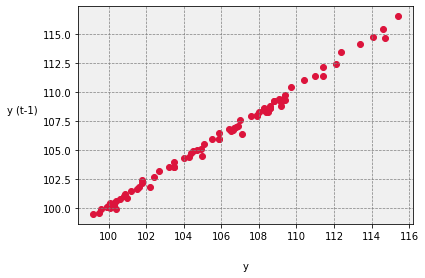

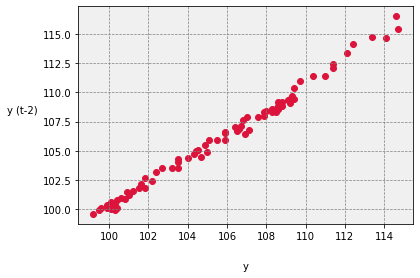

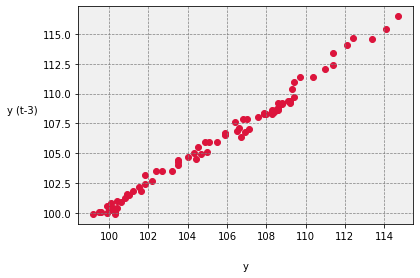

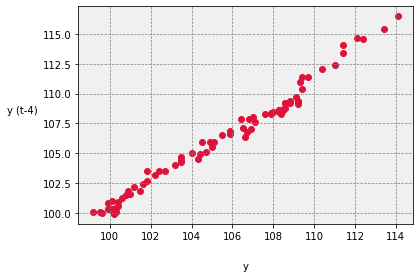

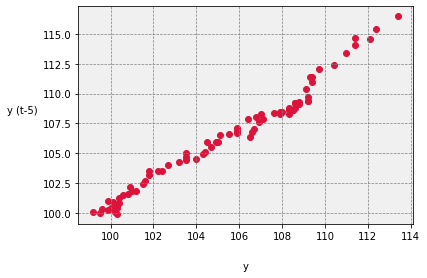

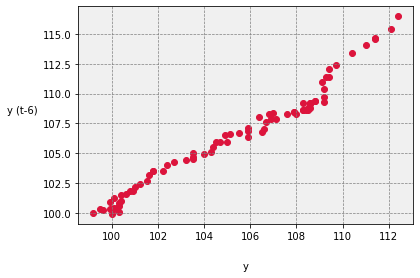

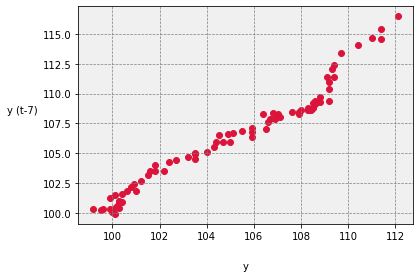

In [131]:
curr_fig, curr_ax = plt.subplots(figsize=(6, 4))
ax14 = lag_plot(dt["CPIH INDEX 00: ALL ITEMS 2015=100"], c = '#DC143C', lag = 1);
my_color="0.94"
curr_ax.set_facecolor(my_color)
curr_ax.grid(which="major", color="grey", linestyle="--", linewidth=0.7)
ax14.set_ylabel('y (t-1)', rotation=0, fontsize=10, labelpad=20)
ax14.set_xlabel('y', rotation=0, fontsize=10, labelpad=20)
plt.show()
fig = ax14.get_figure()
fig.savefig("Lag_plot_1.png", bbox_inches = 'tight')


curr_fig, curr_ax = plt.subplots(figsize=(6, 4))
ax14 = lag_plot(dt["CPIH INDEX 00: ALL ITEMS 2015=100"], c = '#DC143C', lag = 2);
my_color="0.94"
curr_ax.set_facecolor(my_color)
curr_ax.grid(which="major", color="grey", linestyle="--", linewidth=0.7)
ax14.set_ylabel('y (t-2)', rotation=0, fontsize=10, labelpad=20)
ax14.set_xlabel('y', rotation=0, fontsize=10, labelpad=20)
plt.show()
fig = ax14.get_figure()
fig.savefig("Lag_plot_2.png", bbox_inches = 'tight')


curr_fig, curr_ax = plt.subplots(figsize=(6, 4))
ax14 = lag_plot(dt["CPIH INDEX 00: ALL ITEMS 2015=100"], c = '#DC143C', lag = 3);
my_color="0.94"
curr_ax.set_facecolor(my_color)
curr_ax.grid(which="major", color="grey", linestyle="--", linewidth=0.7)
ax14.set_ylabel('y (t-3)', rotation=0, fontsize=10, labelpad=20)
ax14.set_xlabel('y', rotation=0, fontsize=10, labelpad=20)
plt.show()
fig = ax14.get_figure()
fig.savefig("Lag_plot_3.png", bbox_inches = 'tight')


curr_fig, curr_ax = plt.subplots(figsize=(6, 4))
ax14 = lag_plot(dt["CPIH INDEX 00: ALL ITEMS 2015=100"], c = '#DC143C', lag = 4);
my_color="0.94"
curr_ax.set_facecolor(my_color)
curr_ax.grid(which="major", color="grey", linestyle="--", linewidth=0.7)
ax14.set_ylabel('y (t-4)', rotation=0, fontsize=10, labelpad=20)
ax14.set_xlabel('y', rotation=0, fontsize=10, labelpad=20)
plt.show()
fig = ax14.get_figure()
fig.savefig("Lag_plot_4.png", bbox_inches = 'tight')


curr_fig, curr_ax = plt.subplots(figsize=(6, 4))
ax14 = lag_plot(dt["CPIH INDEX 00: ALL ITEMS 2015=100"], c = '#DC143C', lag = 5);
my_color="0.94"
curr_ax.set_facecolor(my_color)
curr_ax.grid(which="major", color="grey", linestyle="--", linewidth=0.7)
ax14.set_ylabel('y (t-5)', rotation=0, fontsize=10, labelpad=20)
ax14.set_xlabel('y', rotation=0, fontsize=10, labelpad=20)
plt.show()
fig = ax14.get_figure()
fig.savefig("Lag_plot_5.png", bbox_inches = 'tight')


curr_fig, curr_ax = plt.subplots(figsize=(6, 4))
ax14 = lag_plot(dt["CPIH INDEX 00: ALL ITEMS 2015=100"], c = '#DC143C', lag = 6);
my_color="0.94"
curr_ax.set_facecolor(my_color)
curr_ax.grid(which="major", color="grey", linestyle="--", linewidth=0.7)
ax14.set_ylabel('y (t-6)', rotation=0, fontsize=10, labelpad=20)
ax14.set_xlabel('y', rotation=0, fontsize=10, labelpad=20)
plt.show()
fig = ax14.get_figure()
fig.savefig("Lag_plot_6.png", bbox_inches = 'tight')


curr_fig, curr_ax = plt.subplots(figsize=(6, 4))
ax14 = lag_plot(dt["CPIH INDEX 00: ALL ITEMS 2015=100"], c = '#DC143C', lag = 7);
my_color="0.94"
curr_ax.set_facecolor(my_color)
curr_ax.grid(which="major", color="grey", linestyle="--", linewidth=0.7)
ax14.set_ylabel('y (t-7)', rotation=0, fontsize=10, labelpad=20)
ax14.set_xlabel('y', rotation=0, fontsize=10, labelpad=20)
plt.show()
fig = ax14.get_figure()
fig.savefig("Lag_plot_7.png", bbox_inches = 'tight')

##### In the Lag plots, on the x-axis lays the y value - CPI and on the y-axis is the y (t - i) lagged value. The relationship is linear which suggests high Autocorrelation and that an AR model is suitable. The effect is weakened at lag 7.

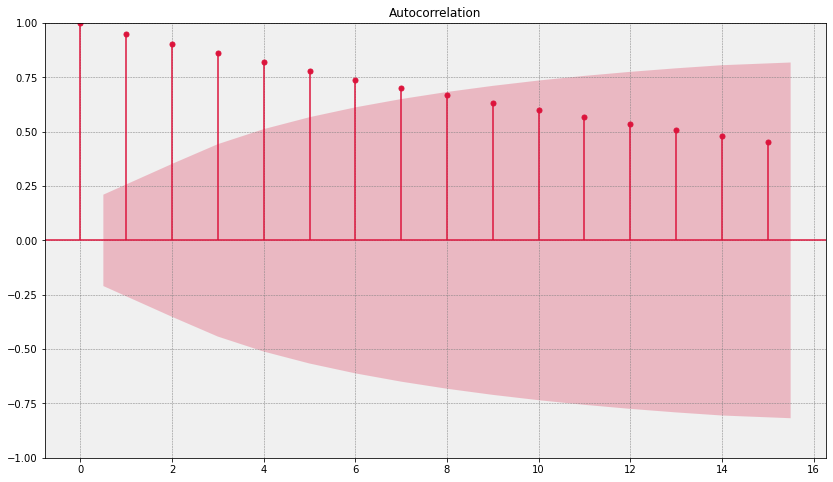

In [132]:
from matplotlib.collections import PolyCollection, LineCollection
...
curr_fig, curr_ax = plt.subplots(figsize=(14, 8))

ax13 = plot_acf(dt["CPIH INDEX 00: ALL ITEMS 2015=100"].values.squeeze(), lags=15, ax=curr_ax)


my_color2="0.94"
curr_ax.set_facecolor(my_color2)
my_color="#DC143C"

for item in curr_ax.collections:
    #change the color of the CI 
    if type(item)==PolyCollection:
        item.set_facecolor(my_color)
    #change the color of the vertical lines
    if type(item)==LineCollection:
        item.set_color(my_color)    

#change the color of the markers/horizontal line
for item in curr_ax.lines:
    item.set_color(my_color)
    
curr_ax.grid(which="major", color="grey", linestyle="--", linewidth=0.5)

plt.show()
fig = ax13.get_figure()
fig.savefig("ACF_plot.png")

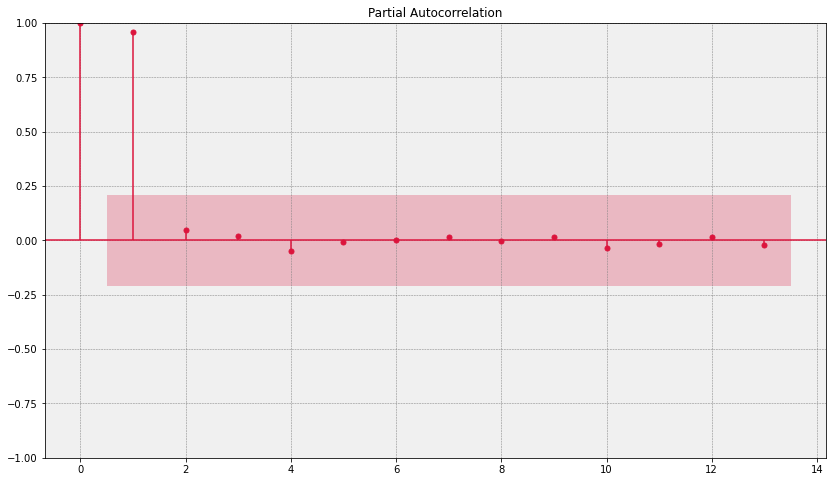

In [133]:
curr_fig, curr_ax = plt.subplots(figsize=(14, 8))

ax15 = plot_pacf(dt["CPIH INDEX 00: ALL ITEMS 2015=100"].values.squeeze(), lags=13, ax=curr_ax)

my_color2="0.94"
curr_ax.set_facecolor(my_color2)
my_color="#DC143C"


for item in curr_ax.collections:
    #change the color of the CI 
    if type(item)==PolyCollection:
        item.set_facecolor(my_color)
    #change the color of the vertical lines
    if type(item)==LineCollection:
        item.set_color(my_color)    

#change the color of the markers/horizontal line
for item in curr_ax.lines:
    item.set_color(my_color)
    
curr_ax.grid(which="major", color="grey", linestyle="--", linewidth=0.5)

plt.show()
fig = ax15.get_figure()
fig.savefig("PACF_plot.png")

#### Train - Test split

In [134]:
train = dt.iloc[:63]
test = dt.iloc[63:]

In [135]:
train

Bank Rate  CPIH INDEX 00: ALL ITEMS 2015=100  BR(t-15)
Date                                                              
2015-01-31   0.500000                               99.2      0.50
2015-02-28   0.500000                               99.5      0.50
2015-03-31   0.500000                               99.6      0.50
2015-04-30   0.500000                               99.9      0.50
2015-05-31   0.500000                              100.1      0.50
...               ...                                ...       ...
2019-11-30   0.750000                              108.5      0.75
2019-12-31   0.750000                              108.5      0.75
2020-01-31   0.750000                              108.3      0.75
2020-02-29   0.750000                              108.6      0.75
2020-03-31   0.347727                              108.6      0.75

[63 rows x 3 columns]

#### Visualization of training & test set

In [136]:
dataset1
train1 = dataset1[:63]
test1 = dataset1[63:]

In [137]:
test1.reset_index(inplace = True)
train1.reset_index(inplace = True)

In [138]:
fig= go.Figure()
fig.add_trace(go.Scatter(dict(x=train1.Date, y=train1["CPIH INDEX 00: ALL ITEMS 2015=100"], mode="lines+markers", name= "Train")))
fig.add_trace(go.Scatter(dict(x=test1.Date, y=test1["CPIH INDEX 00: ALL ITEMS 2015=100"], mode="lines+markers", name= "Test")))
fig.layout = Layout(paper_bgcolor='rgba(0.97,0.97,0.97,0.97)', plot_bgcolor='rgba(0.97,0.97,0.97,0.97)')
fig.update_layout(title=go.layout.Title(
 text="Consumer Price Index for 2015–2022",
 xref="paper",x=0),
 margin=dict(l=10, r=0, t=50, b=50),
 xaxis=go.layout.XAxis(title=go.layout.xaxis.Title(text="Year",font=dict(
 family="Courier New, monospace",
 size=18,
 color="#7f7f7f"))),
 yaxis=go.layout.YAxis(title=go.layout.yaxis.Title(text="Inflation",font=dict(
 family="Courier New, monospace",
 size=18,
 color="#7f7f7f"))))


fig.show()

pio.write_html(fig, file='CPI_train_test_line.html', auto_open=False)
fig.write_image("images/cpi_trend_monthly.jpeg")

In [139]:
auto_arima(train["CPIH INDEX 00: ALL ITEMS 2015=100"], exogenous = train[["BR(t-15)"]], seasonal=True, m = 12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   63
Model:             SARIMAX(0, 1, 0)x(1, 0, [1], 12)   Log Likelihood                  25.185
Date:                              Thu, 21 Jul 2022   AIC                            -40.370
Time:                                      01:25:44   BIC                            -29.734
Sample:                                  01-31-2015   HQIC                           -36.194
                                       - 03-31-2020                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0115      0.012      0.925      0.355      -0.013       0.036
BR(t-15)      -0.8262      0.377     -2.191      0.028      -1.565      -0.087
ar.S.L12       0.9153      0.092      9.924      0.000       0.735       1.096
ma.S.L12      -0.3996      0.293     -1.365      0.172      -0.973       0.174
sigma2         0.0211      0.005      4.588      0.000       0.012       0.030
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):                 0.34
Prob(Q):                              0.69   Prob(JB):                         0.84
Heteroskedasticity (H):               0.79   Skew:                             0.13
Prob(H) (two-sided):                  0.59   Kurtosis:                         3.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [140]:
model = SARIMAX(train["CPIH INDEX 00: ALL ITEMS 2015=100"], exog = train[["BR(t-15)"]], order = (0,1,0), seasonal_order = (1,0,1,12), enforce_invertibility=False)

In [141]:
result = model.fit()

In [142]:
print(result.summary())

                                       SARIMAX Results                                       
Dep. Variable:     CPIH INDEX 00: ALL ITEMS 2015=100   No. Observations:                   63
Model:              SARIMAX(0, 1, 0)x(1, 0, [1], 12)   Log Likelihood                  23.000
Date:                               Thu, 21 Jul 2022   AIC                            -38.001
Time:                                       01:25:45   BIC                            -29.492
Sample:                                   01-31-2015   HQIC                           -34.660
                                        - 03-31-2020                                         
Covariance Type:                                 opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
BR(t-15)      -0.7962      0.407     -1.956      0.050      -1.594       0.001
ar.S.L12   

#### Ljung–Box test:
##### Null hypothesis: There are no correlations in the residuals.
##### Ljung_Box test, Prob(Q) > L1(Q) = 0.57 > 0.05 --> we accept the null hypothesis that the errors are not autocorrelated


#### Jarque–Bera test:
##### Null hypothesis: Residuals are normally distributed.
##### Jarque-Bera test, porb(JB) > (JB) = 0.71 > 0.05 --> we accept the null hypothesis that the residuals are normally distributed

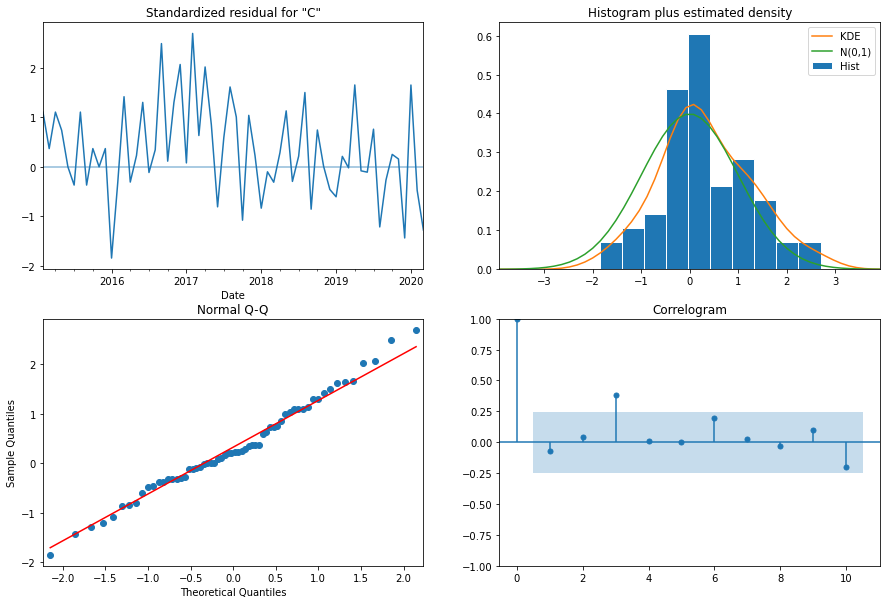

In [143]:
result.plot_diagnostics(figsize=(15,10));

#### From the normal Q-Q plot, we can see that we almost have a straight line, which suggest no systematic departure from normality ie normal distribution
#### The correlogram on the bottom right suggests that there is no autocorrelation in the residuals, and so they are effectively white noise.
#### The residuals have zero mean. If the residuals have a mean other than zero, then the forecasts are biased.

#### The Ljung-Box test is a statistical test that checks if autocorrelation exists in a time series.
#### H0: The residuals are independently distributed.
#### H1: The residuals are not independently distributed; they exhibit serial correlation
#### if p value > 0.05 we reject the null hypothesis

In [144]:
start = len(train)
end = len(train)+len(test)-1

In [145]:
test

Bank Rate  CPIH INDEX 00: ALL ITEMS 2015=100  BR(t-15)
Date                                                              
2020-04-30   0.100000                              108.6  0.750000
2020-05-31   0.100000                              108.6  0.750000
2020-06-30   0.100000                              108.8  0.750000
2020-07-31   0.100000                              109.2  0.750000
2020-08-31   0.100000                              108.8  0.750000
2020-09-30   0.100000                              109.2  0.750000
2020-10-31   0.100000                              109.2  0.750000
2020-11-30   0.100000                              109.1  0.750000
2020-12-31   0.100000                              109.4  0.750000
2021-01-31   0.100000                              109.3  0.750000
2021-02-28   0.100000                              109.4  0.750000
2021-03-31   0.100000                              109.7  0.750000
2021-04-30   0.100000                              110.4  0.750000
2021-05-31   0.100000                              111.0  0.347727
2021-06-30   0.100000                              111.4  0.100000
2021-07-31   0.100000                              111.4  0.100000
2021-08-31   0.100000                              112.1  0.100000
2021-09-30   0.100000                              112.4  0.100000
2021-10-31   0.100000                              113.4  0.100000
2021-11-30   0.100000                              114.1  0.100000
2021-12-31   0.171429                              114.7  0.100000
2022-01-31   0.250000                              114.6  0.100000
2022-02-28   0.475000                              115.4  0.100000
2022-03-31   0.619565                              116.5  0.100000

In [146]:
predictions = result.predict(start,end,exog=test[["BR(t-15)"]]).rename("SARIMAX")

In [147]:
predictions

2020-04-30    109.069952
2020-05-31    109.353799
2020-06-30    109.359612
2020-07-31    109.411852
2020-08-31    109.756709
2020-09-30    109.864240
2020-10-31    109.934569
2020-11-30    110.120802
2020-12-31    110.198173
2021-01-31    109.922873
2021-02-28    110.227944
2021-03-31    110.296701
2021-04-30    110.734532
2021-05-31    111.319256
2021-06-30    111.521904
2021-07-31    111.570574
2021-08-31    111.891860
2021-09-30    111.992042
2021-10-31    112.057564
2021-11-30    112.231068
2021-12-31    112.303151
2022-01-31    112.046667
2022-02-28    112.330887
2022-03-31    112.394944
Freq: M, Name: SARIMAX, dtype: float64

In [148]:
preds = pd.DataFrame(predictions)

In [149]:
preds.reset_index(inplace = True)

In [150]:
test1 = pd.concat([test1, preds], axis = 1)

In [151]:
fig= go.Figure()
fig.add_trace(go.Scatter(dict(x=train1.Date, y=train1["CPIH INDEX 00: ALL ITEMS 2015=100"], mode="lines+markers", name= "Train")))
fig.add_trace(go.Scatter(dict(x=test1.Date, y=test1["CPIH INDEX 00: ALL ITEMS 2015=100"], mode="lines+markers", name= "Test")))
fig.add_trace(go.Scatter(dict(x=test1.Date, y=test1["SARIMAX"], mode="lines+markers", name= "Predictions")))
fig.layout = Layout(paper_bgcolor='rgba(0.97,0.97,0.97,0.97)', plot_bgcolor='rgba(0.97,0.97,0.97,0.97)')
fig.update_layout(title=go.layout.Title(
 text="Consumer Price Index for 2015–2022",
 xref="paper",x=0),
 margin=dict(l=10, r=0, t=50, b=50),
 xaxis=go.layout.XAxis(title=go.layout.xaxis.Title(text="Year",font=dict(
 family="Courier New, monospace",
 size=18,
 color="#7f7f7f"))),
 yaxis=go.layout.YAxis(title=go.layout.yaxis.Title(text="Inflation",font=dict(
 family="Courier New, monospace",
 size=18,
 color="#7f7f7f"))))


fig.show()

pio.write_html(fig, file='CPI_train_test_line.html', auto_open=False)
fig.write_image("images/cpi_preds.jpeg")

In [152]:
eror = rmse(test["CPIH INDEX 00: ALL ITEMS 2015=100"], predictions)

In [153]:
eror

1.44985288330527

#### Forecasting on future values

In [154]:
dataset.tail(30)

Bank Rate  CPIH INDEX 00: ALL ITEMS 2015=100  BR(t-15)
91    0.750000                              108.5  0.750000
92    0.750000                              108.3  0.750000
93    0.750000                              108.6  0.750000
94    0.347727                              108.6  0.750000
95    0.100000                              108.6  0.750000
96    0.100000                              108.6  0.750000
97    0.100000                              108.8  0.750000
98    0.100000                              109.2  0.750000
99    0.100000                              108.8  0.750000
100   0.100000                              109.2  0.750000
101   0.100000                              109.2  0.750000
102   0.100000                              109.1  0.750000
103   0.100000                              109.4  0.750000
104   0.100000                              109.3  0.750000
105   0.100000                              109.4  0.750000
106   0.100000                              109.7  0.750000
107   0.100000                              110.4  0.750000
108   0.100000                              111.0  0.347727
109   0.100000                              111.4  0.100000
110   0.100000                              111.4  0.100000
111   0.100000                              112.1  0.100000
112   0.100000                              112.4  0.100000
113   0.100000                              113.4  0.100000
114   0.100000                              114.1  0.100000
115   0.171429                              114.7  0.100000
116   0.250000                              114.6  0.100000
117   0.475000                              115.4  0.100000
118   0.619565                              116.5  0.100000
119   0.750000                                NaN  0.100000
120   0.944444                                NaN  0.100000

In [155]:
model = SARIMAX(dt['CPIH INDEX 00: ALL ITEMS 2015=100'],exog=dt[["BR(t-15)"]],order = (0,1,0), seasonal_order = (1,0,1,12),enforce_invertibility=False)
results = model.fit()

In [156]:
d = {'BR': [0.10, 0.10, 0.10], "date": ["2022-04-30","2022-05-31", "2022-06-30"] }

In [157]:
exog_forecast = pd.DataFrame(d)

In [158]:
exog_forecast = exog_forecast.set_index("date")

In [159]:
exog_forecast

BR
date           
2022-04-30  0.1
2022-05-31  0.1
2022-06-30  0.1

In [160]:
lagged_BR = exog_forecast

In [161]:
fcast = results.predict( len(dt), len(dt)+2, exog = exog_forecast[["BR"]]).rename("CPI SARIMAX FORECAST")

In [162]:
fcast1 = pd.DataFrame(fcast)
fcast1

CPI SARIMAX FORECAST
2022-04-30            116.845569
2022-05-31            117.036877
2022-06-30            117.109603

In [163]:
exog_forecast.index

Index(['2022-04-30', '2022-05-31', '2022-06-30'], dtype='object', name='date')

In [164]:
exog_forecast.index = pd.to_datetime(exog_forecast.index)

In [165]:
exog_forecast.index.freq = "M"

In [166]:
fcast1 = pd.concat([exog_forecast,fcast1], axis = 1)

In [167]:
fcast1.reset_index(inplace = True)
fcast1

index   BR  CPI SARIMAX FORECAST
0 2022-04-30  0.1            116.845569
1 2022-05-31  0.1            117.036877
2 2022-06-30  0.1            117.109603

In [168]:
fcast1.rename(columns = {'index':'Date', 'BR':'BR(t-14)', 'CPI SARIMAX FORECAST':'CPIH INDEX 00: ALL ITEMS 2015=100'}, inplace = True)

In [169]:
fcast1

Date  BR(t-14)  CPIH INDEX 00: ALL ITEMS 2015=100
0 2022-04-30       0.1                         116.845569
1 2022-05-31       0.1                         117.036877
2 2022-06-30       0.1                         117.109603

In [170]:
fig= go.Figure()
fig.add_trace(go.Scatter(dict(x=train1.Date, y=train1["CPIH INDEX 00: ALL ITEMS 2015=100"], mode="lines+markers", name= "Train")))
fig.add_trace(go.Scatter(dict(x=test1.Date, y=test1["CPIH INDEX 00: ALL ITEMS 2015=100"], mode="lines+markers", name= "Test")))
fig.add_trace(go.Scatter(dict(x=fcast1.Date, y=fcast1["CPIH INDEX 00: ALL ITEMS 2015=100"], mode="lines+markers", name= "Test")))
fig.layout = Layout(paper_bgcolor='rgba(248,248,255)', plot_bgcolor='rgba(248,248,255)')
fig.update_layout(title=go.layout.Title(
 text="Consumer Price Index for 2015–2022",
 xref="paper",x=0),
 margin=dict(l=10, r=0, t=50, b=50),
 xaxis=go.layout.XAxis(title=go.layout.xaxis.Title(text="Year",font=dict(
 family="Courier New, monospace",
 size=18,
 color="#7f7f7f"))),
 yaxis=go.layout.YAxis(title=go.layout.yaxis.Title(text="Inflation",font=dict(
 family="Courier New, monospace",
 size=18,
 color="#7f7f7f"))))


fig.show()

pio.write_html(fig, file='CPI_train_test_line.html', auto_open=False)
fig.write_image("images/cpi_forecast_white.jpeg")

#### The final part, after the model is trained is to make actual predictions. The predictions that are made are for the 2nd quarter of 2022 or the months of April, May & June. Lagged values of the Bank rate are added to the predictions and we get the results of the rates of inflation to be : 116.8455, 117.0368, 117.1096. 